In [ ]:
import pandas as pd
import datetime
import pytz
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 20)

icom_eia_forecasts = pd.read_csv('data/InvestingcomEIA.csv')
print("icom_eia_forecasts:")
display(icom_eia_forecasts)

fxstreet_eia_forecasts = pd.read_csv('data/FXStreetEIA.csv')
print("fxstreet_eia_forecasts:")
display(fxstreet_eia_forecasts)
print("fxstreet_api_forecasts:")
fxstreet_api_forecasts = pd.read_csv('data/FXStreetAPI.csv')
display(fxstreet_api_forecasts)

min_WTI = pd.read_csv(
    'data/cl-1m.csv',
    sep=';',
    header=None,
    names=['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
)

# Print the head of the DataFrame to verify it's loaded correctly
display(min_WTI)
min_WTI = min_WTI[1225975:]
display(min_WTI)



In [ ]:
display(min_WTI)
display(icom_eia_forecasts)

,Date,Time,Open,High,Low,Close,Volume,Datetime
Datetime_CST,,,,,,,,
2011-03-07 23:59:00-06:00,07/03/2011,23:59:00,104.74,104.77,104.73,104.73,18,2011-03-07 23:59:00
2011-03-08 00:00:00-06:00,08/03/2011,00:00:00,104.74,104.82,104.74,104.81,34,2011-03-08 00:00:00
2011-03-08 00:01:00-06:00,08/03/2011,00:01:00,104.82,104.84,104.82,104.82,12,2011-03-08 00:01:00
2011-03-08 00:02:00-06:00,08/03/2011,00:02:00,104.81,104.81,104.73,104.75,20,2011-03-08 00:02:00
2011-03-08 00:03:00-06:00,08/03/2011,00:03:00,104.74,104.76,104.71,104.76,25,2011-03-08 00:03:00
...,...,...,...,...,...,...,...,...
2025-03-11 23:54:00-05:00,11/03/2025,23:54:00,66.75,66.75,66.75,66.75,13,2025-03-11 23:54:00
2025-03-11 23:56:00-05:00,11/03/2025,23:56:00,66.75,66.75,66.74,66.74,3,2025-03-11 23:56:00
2025-03-11 23:58:00-05:00,11/03/2025,23:58:00,66.75,66.75,66.75,66.75,3,2025-03-11 23:58:00


,Release Date,Time,Actual,Forecast,Previous,Release_Datetime,Release_Datetime_EST,supply_surprise
Release_Datetime_CST,,,,,,,,
2011-03-09 09:30:00-06:00,9-Mar-11,10:30,2.500M,1.100M,-0.400M,2011-03-09 10:30:00,2011-03-09 10:30:00-05:00,1.400
2011-03-16 08:30:00-05:00,16-Mar-11,9:30,1.700M,1.800M,2.500M,2011-03-16 09:30:00,2011-03-16 09:30:00-04:00,-0.100
2011-03-23 08:30:00-05:00,23-Mar-11,9:30,2.100M,2.000M,1.700M,2011-03-23 09:30:00,2011-03-23 09:30:00-04:00,0.100
2011-03-30 08:30:00-05:00,30-Mar-11,9:30,2.900M,2.000M,2.100M,2011-03-30 09:30:00,2011-03-30 09:30:00-04:00,0.900
2011-04-06 08:30:00-05:00,6-Apr-11,9:30,2.000M,1.300M,2.900M,2011-04-06 09:30:00,2011-04-06 09:30:00-04:00,0.700
...,...,...,...,...,...,...,...,...
2025-02-12 09:30:00-06:00,12-Feb-25,10:30,4.070M,2.400M,8.664M,2025-02-12 10:30:00,2025-02-12 10:30:00-05:00,1.670
2025-02-20 11:00:00-06:00,20-Feb-25,12:00,4.633M,3.200M,4.070M,2025-02-20 12:00:00,2025-02-20 12:00:00-05:00,1.433
2025-02-26 09:00:00-06:00,26-Feb-25,10:00,-2.332M,2.500M,4.633M,2025-02-26 10:00:00,2025-02-26 10:00:00-05:00,-4.832


In [ ]:
def standardize_eia_datetime(row):
    release_date = pd.to_datetime(row['Release Date'], format='%d-%b-%y', errors='coerce').date()
    release_time = pd.to_datetime(row['Time'], format='%H:%M', errors='coerce').time()

    if pd.isna(release_date) or pd.isna(release_time):
        print('nan') #If this triggers, something is wrong
        return pd.NaT

    combined_datetime = pd.Timestamp.combine(release_date, release_time)
    return combined_datetime

icom_eia_forecasts['Release_Datetime'] = icom_eia_forecasts.apply(standardize_eia_datetime, axis=1)

display(icom_eia_forecasts)

eastern_tz = pytz.timezone('US/Eastern')
icom_eia_forecasts['Release_Datetime_EST'] = icom_eia_forecasts['Release_Datetime'].dt.tz_localize(eastern_tz, ambiguous='infer', nonexistent='shift_forward')

chicago_tz = pytz.timezone('America/Chicago')
icom_eia_forecasts['Release_Datetime_CST'] = icom_eia_forecasts['Release_Datetime_EST'].dt.tz_convert(chicago_tz)

display(icom_eia_forecasts)

In [ ]:
def standardize_wti_datetime(row):
    """Standardizes datetime for min_res_OIH dataframe."""
    date_str = row['Date']
    time_str = row['Time']

    #print(date_str + ' ' + time_str)#debug

    combined_datetime = pd.to_datetime(date_str + ' ' + time_str, format='%d/%m/%Y %H:%M:%S', errors='coerce') # Combined format

    #print(combined_datetime)#debug

    if pd.isna(combined_datetime):
        print('nan')#If this triggers, something is wrong
        return pd.NaT
    return combined_datetime

min_WTI['Datetime'] = min_WTI.apply(standardize_wti_datetime, axis=1)

min_WTI['Datetime_CST'] = min_WTI['Datetime'].dt.tz_localize(chicago_tz, ambiguous='infer', nonexistent='shift_forward')
display(min_WTI)

In [ ]:
icom_eia_forecasts = icom_eia_forecasts.set_index('Release_Datetime_CST').sort_index()
min_WTI = min_WTI.set_index('Datetime_CST').sort_index()

In [ ]:
display(icom_eia_forecasts)
display(min_WTI)


In [ ]:
'''
def calculate_price_change(eia_release_times, price_data, time_interval_minutes):
    """
    Calculates the percentage price change in the price_data dataframe
    for each release time in eia_release_times, over the specified time interval.

    Args:
        eia_release_times (pd.DatetimeIndex): Index of the icom_eia_forecasts dataframe (release datetimes).
        price_data (pd.DataFrame): min_res_OIH dataframe with Datetime index and 'Close' price column.
        time_interval_minutes (int): Time interval in minutes for price change calculation.

    Returns:
        list: List of price changes for each release event, or pd.NA if data is missing.
    """
    price_changes = []
    for release_time in eia_release_times:
        try:
            # Get price at release time
            release_price = price_data.loc[release_time]['Close']

            # Get price at time_interval_minutes after release
            future_time = release_time + pd.Timedelta(minutes=time_interval_minutes)
            future_price = price_data.loc[future_time]['Close']

            price_change = ((future_price - release_price) / release_price) * 100.0
            price_changes.append(price_change)

        except KeyError:
            #price data is missing when 0 volume so give 0 % price change
            price_changes.append(0.0)

    return price_changes

time_intervals_minutes = [1, 5, 10, 60]

price_change_column_names = []
for interval in time_intervals_minutes:
    col_name = f'{interval}_Minute_Percent_Price_Change' if interval < 60 else f'{interval//60}_Hour_Percent_Price_Change'
    price_change_column_names.append(col_name)

# remove cols if already there
columns_to_drop = [col for col in price_change_column_names if col in icom_eia_forecasts.columns]
if columns_to_drop:
    print(f"Removing existing columns: {columns_to_drop}")
    icom_eia_forecasts.drop(columns=columns_to_drop, inplace=True)

# add % price change columns
for interval, col_name in zip(time_intervals_minutes, price_change_column_names):
    icom_eia_forecasts[col_name] = calculate_price_change(icom_eia_forecasts.index, min_res_OIH, interval)


display(icom_eia_forecasts)
'''

In [ ]:
'''

percentage_change_columns = [
    '1_Minute_Percent_Price_Change',
    '5_Minute_Percent_Price_Change',
    '10_Minute_Percent_Price_Change',
    '1_Hour_Percent_Price_Change'
]

average_price_changes = icom_eia_forecasts[percentage_change_columns].abs().mean() # want to look at raw magnitude of price change values, so abs()

intervals = [
    '1-Minute',
    '5-Minute',
    '10-Minute',
    '1-Hour'
]


fig = go.Figure(data=[go.Bar(x=intervals, y=average_price_changes.values,
                            text=average_price_changes.values.round(3), # Display values on bars
                            textposition='outside')])

fig.update_layout(
    title='Average Percentage Price Change Following EIA WPSR Report Releases',
    xaxis_title='Time Interval After Release',
    yaxis_title='Average Percentage Price Change',
    yaxis_gridcolor='lightgray' # Add light gray grid lines for better readability
)

iplot(fig)
'''

In [ ]:
def calculate_supply_surprise(df):
    """
    Calculates the 'supply_surprise' column as the difference between 'Actual' and 'Forecast'.
    Handles 'M' suffix and converts to numeric.

    Args:
        df (pd.DataFrame): icom_eia_forecasts DataFrame.

    Returns:
        pd.Series: Supply surprise values.
    """
    actual = df['Actual'].str.replace('M', '', regex=False).astype(float)
    forecast = df['Forecast'].str.replace('M', '', regex=False).astype(float)
    supply_surprise = actual - forecast
    return supply_surprise

icom_eia_forecasts['supply_surprise'] = calculate_supply_surprise(icom_eia_forecasts)

display(icom_eia_forecasts)

In [ ]:
supply_surprise_data = icom_eia_forecasts['supply_surprise']

fig_hist = go.Figure(data=[go.Histogram(x=supply_surprise_data, nbinsx=100)])

fig_hist.update_layout(
    title='Histogram of EIA WPSR Crude Oil Supply Surprise',
    xaxis_title='Supply Surprise (Actual - Forecast, Million Barrels)',
    yaxis_title='Frequency (Number of Releases)',
    bargap=0.1
)

fig_hist.show()

In [ ]:
'''
price_change_columns = [
    '1_Minute_Percent_Price_Change',
    '5_Minute_Percent_Price_Change',
    '10_Minute_Percent_Price_Change',
    '1_Hour_Percent_Price_Change'
]

for col in price_change_columns:
    price_change_data = icom_eia_forecasts[col].dropna()

    fig_hist_price_change = go.Figure(data=[go.Histogram(x=price_change_data, nbinsx=100)])

    fig_hist_price_change.update_layout(
        title=f'Histogram of {col} After EIA WPSR Release',
        xaxis_title='Percentage Price Change (%)',
        yaxis_title='Frequency (Number of Releases)',
        bargap=0.1
    )

    fig_hist_price_change.show()
'''

In [ ]:
'''
from plotly.subplots import make_subplots
from scipy import stats  # Import scipy.stats for statistical tests

# Assume your dataframes are already loaded as icom_eia_forecasts and min_res_OIH
# and that you have run all the previous code blocks, including price change calculations and supply_surprise

# --- Kolmogorov-Smirnov Test ---

price_change_columns = [
    '1_Minute_Percent_Price_Change',
    '5_Minute_Percent_Price_Change',
    '10_Minute_Percent_Price_Change',
    '1_Hour_Percent_Price_Change'
]

print("Kolmogorov-Smirnov Test for Normality of Price Changes:\n")

for col in price_change_columns:
    price_change_data = icom_eia_forecasts[col].dropna() # Drop NA values

    # Standardize the data to have mean=0 and std=1 for comparison with standard normal
    standardized_data = (price_change_data - price_change_data.mean()) / price_change_data.std()

    # Perform Kolmogorov-Smirnov test against standard normal distribution (cdf='norm')
    ks_statistic, p_value = stats.kstest(standardized_data, 'norm')

    print(f"Column: {col}")
    print(f"KS Statistic: {ks_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"P-value < {alpha}: Reject the null hypothesis. Distribution is significantly different from normal.\n")
    else:
        print(f"P-value >= {alpha}: Fail to reject the null hypothesis. Distribution is not significantly different from normal (at alpha={alpha}).\n")
    print("-" * 40)
'''

In [ ]:
display(min_WTI.head())

In [ ]:
#1 minute 30 seconds

percentage_price_changes_1min_wti = []
previous_close_price = None

for index, row in min_WTI.iterrows():
    current_close_price = row['Close']
    if previous_close_price is not None and previous_close_price != 0:
        percentage_change = ((current_close_price - previous_close_price) / previous_close_price) * 100.0
        percentage_price_changes_1min_wti.append(percentage_change)
    else:
        percentage_price_changes_1min_wti.append(float('nan'))
    previous_close_price = current_close_price

percentage_price_changes_1min_wti_series = pd.Series(percentage_price_changes_1min_wti, index=min_WTI.index)
display(percentage_price_changes_1min_wti_series)
min_WTI['Percent_Change'] = percentage_price_changes_1min_wti_series
percentage_price_changes_1min_wti_series = percentage_price_changes_1min_wti_series.dropna()

# --- Histogram of Filtered One-Minute Percentage Price Changes in min_res_OIH ---

fig_hist_1min_wti = go.Figure(data=[go.Histogram(x=percentage_price_changes_1min_wti, nbinsx=1600)])

fig_hist_1min_wti.update_layout(
    title='Histogram of One-Minute Percentage Price Changes in Crude Price',
    xaxis_title='One-Minute Percentage Price Change (%)',
    yaxis_title='Frequency (Number of Minutes)',
    xaxis_range=[-3, 3],
    #yaxis_range=[0, 300000]
)

fig_hist_1min_wti.show()


In [48]:
min_WTI.describe().apply(lambda s: s.apply('{0:.5f}'.format))
display(min_WTI)

,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change
Datetime_CST,,,,,,,,,
2011-03-07 23:59:00-06:00,07/03/2011,23:59:00,104.74,104.77,104.73,104.73,18,2011-03-07 23:59:00,NaN
2011-03-08 00:00:00-06:00,08/03/2011,00:00:00,104.74,104.82,104.74,104.81,34,2011-03-08 00:00:00,0.076387
2011-03-08 00:01:00-06:00,08/03/2011,00:01:00,104.82,104.84,104.82,104.82,12,2011-03-08 00:01:00,0.009541
2011-03-08 00:02:00-06:00,08/03/2011,00:02:00,104.81,104.81,104.73,104.75,20,2011-03-08 00:02:00,-0.066781
2011-03-08 00:03:00-06:00,08/03/2011,00:03:00,104.74,104.76,104.71,104.76,25,2011-03-08 00:03:00,0.009547
...,...,...,...,...,...,...,...,...,...
2025-03-11 23:54:00-05:00,11/03/2025,23:54:00,66.75,66.75,66.75,66.75,13,2025-03-11 23:54:00,0.000000
2025-03-11 23:56:00-05:00,11/03/2025,23:56:00,66.75,66.75,66.74,66.74,3,2025-03-11 23:56:00,-0.014981
2025-03-11 23:58:00-05:00,11/03/2025,23:58:00,66.75,66.75,66.75,66.75,3,2025-03-11 23:58:00,0.014984


In [ ]:
'''
price_change_columns_eia = [
    '1_Minute_Percent_Price_Change',
    '5_Minute_Percent_Price_Change',
    '10_Minute_Percent_Price_Change',
    '1_Hour_Percent_Price_Change'
]

print("Kolmogorov-Smirnov Test Comparing Distributions:\n"
      "  Distribution 1: One-Minute Percentage Price Changes (All Minutes)\n"
      "  Distribution 2: Percentage Price Changes After EIA WPSR Release (at different intervals)\n\n")

for col_eia in price_change_columns_eia:
    price_change_data_eia = icom_eia_forecasts[col_eia].dropna() # Drop NA values from EIA release price changes

    # Ensure both datasets have data to compare, if not skip this column
    if price_change_data_eia.empty or percentage_price_changes_1min_oih_series.empty:
        print(f"Warning: Skipping KS test for {col_eia} due to empty data in one or both samples.")
        print("-" * 40)
        continue


    # Perform 2-sample Kolmogorov-Smirnov test to compare EIA release price changes vs. all 1-minute price changes
    ks_statistic_2samp, p_value_2samp = stats.ks_2samp(price_change_data_eia, percentage_price_changes_1min_oih_series)

    print(f"EIA Release Price Change Column: {col_eia}")
    print(f"KS Statistic (2-sample): {ks_statistic_2samp:.4f}")
    print(f"P-value (2-sample): {p_value_2samp:.4f}")

    alpha = 0.05  # Significance level
    if p_value_2samp < alpha:
        print(f"P-value < {alpha}: Reject the null hypothesis. Distributions are significantly different.\n")
    else:
        print(f"P-value >= {alpha}: Fail to reject the null hypothesis. Distributions are not significantly different (at alpha={alpha}).\n")
    print("-" * 40)
'''

In [54]:
def get_price_windows(eia_release_times, price_data, window_minutes_before=60, window_minutes_after=60):
    """
    Extracts price data windows around EIA report release times.

    Args:
        eia_release_times (pd.DatetimeIndex): Index of icom_eia_forecasts (release datetimes).
        price_data (pd.DataFrame): min_res_OIH dataframe with Datetime index.
        window_minutes_before (int): Minutes to include before release time.
        window_minutes_after (int): Minutes to include after release time.

    Returns:
        pd.DataFrame: A DataFrame containing price data for all events, within the specified windows.
                      Returns an empty DataFrame if no data is found within any window.
    """
    price_windows_list = []

    for release_time in eia_release_times:
        start_time = release_time - pd.Timedelta(minutes=window_minutes_before)
        #print(start_time)
        end_time = release_time + pd.Timedelta(minutes=window_minutes_after)
        #print(end_time)

        # Select rows from min_res_OIH within the time window
        window_data = price_data.loc[start_time:end_time].copy()
        #display(window_data.head)

        if not window_data.empty: # Only append if there is data in the window
            window_data['Release_Datetime'] = release_time # Add release time as a column for reference
            price_windows_list.append(window_data)

    if price_windows_list:
        price_windows_df = pd.concat(price_windows_list)
        return price_windows_df
    else:
        return pd.DataFrame() # Return empty DataFrame if no data found in any window

# --- Extract Price Windows ---
price_window_60min = get_price_windows(icom_eia_forecasts.index, min_WTI, window_minutes_before=60, window_minutes_after=60)
price_window_60min.sort_index(inplace=True)
if not price_window_60min.empty:
    print("Price data windows extracted successfully!")
    print(f"\nShape of price_window_60min: {price_window_60min.shape}")
else:
    print("No price data found within the specified windows around EIA releases.")


Price data windows extracted successfully!

Shape of price_window_60min: (88344, 10)


In [55]:
display(price_window_60min)

,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change,Release_Datetime
Datetime_CST,,,,,,,,,,
2011-03-09 08:30:00-06:00,09/03/2011,08:30:00,105.56,105.56,105.44,105.46,514,2011-03-09 08:30:00,-0.094733,2011-03-09 09:30:00-06:00
2011-03-09 08:31:00-06:00,09/03/2011,08:31:00,105.46,105.52,105.45,105.46,323,2011-03-09 08:31:00,0.000000,2011-03-09 09:30:00-06:00
2011-03-09 08:32:00-06:00,09/03/2011,08:32:00,105.45,105.47,105.31,105.32,899,2011-03-09 08:32:00,-0.132752,2011-03-09 09:30:00-06:00
2011-03-09 08:33:00-06:00,09/03/2011,08:33:00,105.31,105.37,105.25,105.33,716,2011-03-09 08:33:00,0.009495,2011-03-09 09:30:00-06:00
2011-03-09 08:34:00-06:00,09/03/2011,08:34:00,105.34,105.45,105.31,105.40,660,2011-03-09 08:34:00,0.066458,2011-03-09 09:30:00-06:00
...,...,...,...,...,...,...,...,...,...,...
2025-03-05 10:26:00-06:00,05/03/2025,10:26:00,65.42,65.46,65.37,65.38,713,2025-03-05 10:26:00,-0.061143,2025-03-05 09:30:00-06:00
2025-03-05 10:27:00-06:00,05/03/2025,10:27:00,65.37,65.41,65.37,65.39,640,2025-03-05 10:27:00,0.015295,2025-03-05 09:30:00-06:00
2025-03-05 10:28:00-06:00,05/03/2025,10:28:00,65.40,65.42,65.33,65.36,796,2025-03-05 10:28:00,-0.045879,2025-03-05 09:30:00-06:00


In [56]:

# Assume your price_window_60min dataframe is already loaded
# and has columns 'Datetime', 'Release_Datetime', and 'Volume'

# --- Calculate Time to Release (in minutes) ---
price_window_60min['Time_to_Release_Minutes'] = (price_window_60min.index - price_window_60min['Release_Datetime']).dt.total_seconds() / 60
# --- Group by Time to Release and Calculate Average Volume ---
average_volume_by_time = price_window_60min.groupby('Time_to_Release_Minutes')['Volume'].mean().reset_index()

# --- Create Scatter Plot of Average Volume ---
fig_volume_scatter = go.Figure(data=[go.Scatter(
    x=average_volume_by_time['Time_to_Release_Minutes'],
    y=average_volume_by_time['Volume'],
    mode='markers', # Use markers for scatter plot
    marker=dict(size=8),
    text=average_volume_by_time['Volume'], # Hover text is the volume
    hovertemplate="Time to Release: %{x:.0f} minutes<br>Average Volume: %{y:.0f}<extra></extra>" # Custom hover template
)])

fig_volume_scatter.update_layout(

    title='Average Trading Volume Around EIA WPSR Release',
    xaxis_title='Minutes Relative to EIA Report Release',
    yaxis_title='Average Volume',
    xaxis=dict(
        tickvals=[-60, -45, -30, -15, 0, 15, 30, 45, 60], # Define specific x-axis ticks
        ticktext=['-60', '-45', '-30', '-15', 'Release', '+15', '+30', '+45', '+60'] # Custom tick labels
    ),
    hovermode="closest"
)

fig_volume_scatter.show()

#gonna ignore the huge uptick at +60 b/c im assuming it's the large institutional algos kicking in after market settles from EIA relase.

In [108]:

# Assume price_window_60min dataframe is already loaded and has 'Datetime', 'Close', and 'Release_Datetime' columns

# 1. Calculate Price Changes Relative to Pre-Release Minute
price_window_60min['Time_Delta_Minutes'] = price_window_60min.index - price_window_60min['Release_Datetime']
price_window_60min['Time_Delta_Minutes'] = price_window_60min['Time_Delta_Minutes'].apply(lambda td: td.total_seconds() / 60)
#price_window_60min['Price_Change'] = price_window_60min.groupby('Release_Datetime')['Close'].transform(lambda x: x - x.shift(1))
#price_window_60min['Percent_Change'] = price_window_60min.groupby('Release_Datetime')['Close'].pct_change() * 100

#price_window_60min = price_window_60min.dropna(subset=['Percent_Change']) # Remove rows where shift resulted in NaN

# 2. Define Time Intervals and Price Change Bins for Heatmap
time_intervals_release = sorted(price_window_60min['Time_Delta_Minutes'].unique())
price_change_bins_release = np.linspace(-1, 1, num=41) # Example: Bins from -1% to +1% in 0.05% increments, adjust as needed
price_change_labels_release = [f'{bin_val:.2f}%' for bin_val in price_change_bins] # Labels for bins

# 3.  Bin Price Changes and Count Frequencies
price_window_60min['Price_Change_Bin'] = pd.cut(price_window_60min['Percent_Change'], bins=price_change_bins, labels=price_change_labels[:-1], include_lowest=True)


heatmap_data_release = price_window_60min.groupby(['Price_Change_Bin', 'Time_Delta_Minutes']).size().unstack(fill_value=0)

# Reindex columns and rows to ensure all intervals and bins are present, even if count is zero
heatmap_data_release = heatmap_data_release.reindex(columns=time_intervals, fill_value=0)
heatmap_data_release = heatmap_data_release.reindex(index=price_change_labels[:-1], fill_value=0)

# 4. Create Interactive Heatmap with Plotly
fig_heatmap_release = go.Figure(data=go.Heatmap(
    z=heatmap_data_release.values,
    x=heatmap_data_release.columns,
    y=heatmap_data.index,
    colorscale='Viridis', # Choose a colorscale that suits your preference
    colorbar=dict(title='Frequency')
))

fig_heatmap_release.update_layout(
    title='Frequency of Percentage Price Changes Around EIA WPSR Release',
    xaxis_title='Time Relative to Release (Minutes)',
    yaxis_title='Percentage Price Change Bins',
    yaxis=dict(autorange="reversed"), # Invert y-axis to have positive changes at the top
    xaxis=dict(tickvals=time_intervals[::5], ticktext=[int(x) for x in time_intervals[::5]]) # Show x-axis ticks every 5 minutes
)

fig_heatmap_release.show()
display(price_window_60min)

C:\Users\evans\AppData\Local\Temp\ipykernel_23536\1453523888.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change,Release_Datetime,Time_to_Release_Minutes,Time_Delta_Minutes,Price_Change_Bin
Datetime_CST,,,,,,,,,,,,,
2011-03-09 08:30:00-06:00,09/03/2011,08:30:00,105.56,105.56,105.44,105.46,514,2011-03-09 08:30:00,-0.094733,2011-03-09 09:30:00-06:00,-60.0,-60.0,-0.10%
2011-03-09 08:31:00-06:00,09/03/2011,08:31:00,105.46,105.52,105.45,105.46,323,2011-03-09 08:31:00,0.000000,2011-03-09 09:30:00-06:00,-59.0,-59.0,-0.05%
2011-03-09 08:32:00-06:00,09/03/2011,08:32:00,105.45,105.47,105.31,105.32,899,2011-03-09 08:32:00,-0.132752,2011-03-09 09:30:00-06:00,-58.0,-58.0,-0.15%
2011-03-09 08:33:00-06:00,09/03/2011,08:33:00,105.31,105.37,105.25,105.33,716,2011-03-09 08:33:00,0.009495,2011-03-09 09:30:00-06:00,-57.0,-57.0,0.00%
2011-03-09 08:34:00-06:00,09/03/2011,08:34:00,105.34,105.45,105.31,105.40,660,2011-03-09 08:34:00,0.066458,2011-03-09 09:30:00-06:00,-56.0,-56.0,0.05%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-05 10:26:00-06:00,05/03/2025,10:26:00,65.42,65.46,65.37,65.38,713,2025-03-05 10:26:00,-0.061143,2025-03-05 09:30:00-06:00,56.0,56.0,-0.10%
2025-03-05 10:27:00-06:00,05/03/2025,10:27:00,65.37,65.41,65.37,65.39,640,2025-03-05 10:27:00,0.015295,2025-03-05 09:30:00-06:00,57.0,57.0,0.00%
2025-03-05 10:28:00-06:00,05/03/2025,10:28:00,65.40,65.42,65.33,65.36,796,2025-03-05 10:28:00,-0.045879,2025-03-05 09:30:00-06:00,58.0,58.0,-0.05%


In [58]:
display(min_WTI)
display(icom_eia_forecasts)

,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change
Datetime_CST,,,,,,,,,
2011-03-07 23:59:00-06:00,07/03/2011,23:59:00,104.74,104.77,104.73,104.73,18,2011-03-07 23:59:00,NaN
2011-03-08 00:00:00-06:00,08/03/2011,00:00:00,104.74,104.82,104.74,104.81,34,2011-03-08 00:00:00,0.076387
2011-03-08 00:01:00-06:00,08/03/2011,00:01:00,104.82,104.84,104.82,104.82,12,2011-03-08 00:01:00,0.009541
2011-03-08 00:02:00-06:00,08/03/2011,00:02:00,104.81,104.81,104.73,104.75,20,2011-03-08 00:02:00,-0.066781
2011-03-08 00:03:00-06:00,08/03/2011,00:03:00,104.74,104.76,104.71,104.76,25,2011-03-08 00:03:00,0.009547
...,...,...,...,...,...,...,...,...,...
2025-03-11 23:54:00-05:00,11/03/2025,23:54:00,66.75,66.75,66.75,66.75,13,2025-03-11 23:54:00,0.000000
2025-03-11 23:56:00-05:00,11/03/2025,23:56:00,66.75,66.75,66.74,66.74,3,2025-03-11 23:56:00,-0.014981
2025-03-11 23:58:00-05:00,11/03/2025,23:58:00,66.75,66.75,66.75,66.75,3,2025-03-11 23:58:00,0.014984


,Release Date,Time,Actual,Forecast,Previous,Release_Datetime,Release_Datetime_EST,supply_surprise
Release_Datetime_CST,,,,,,,,
2011-03-09 09:30:00-06:00,9-Mar-11,10:30,2.500M,1.100M,-0.400M,2011-03-09 10:30:00,2011-03-09 10:30:00-05:00,1.400
2011-03-16 08:30:00-05:00,16-Mar-11,9:30,1.700M,1.800M,2.500M,2011-03-16 09:30:00,2011-03-16 09:30:00-04:00,-0.100
2011-03-23 08:30:00-05:00,23-Mar-11,9:30,2.100M,2.000M,1.700M,2011-03-23 09:30:00,2011-03-23 09:30:00-04:00,0.100
2011-03-30 08:30:00-05:00,30-Mar-11,9:30,2.900M,2.000M,2.100M,2011-03-30 09:30:00,2011-03-30 09:30:00-04:00,0.900
2011-04-06 08:30:00-05:00,6-Apr-11,9:30,2.000M,1.300M,2.900M,2011-04-06 09:30:00,2011-04-06 09:30:00-04:00,0.700
...,...,...,...,...,...,...,...,...
2025-02-12 09:30:00-06:00,12-Feb-25,10:30,4.070M,2.400M,8.664M,2025-02-12 10:30:00,2025-02-12 10:30:00-05:00,1.670
2025-02-20 11:00:00-06:00,20-Feb-25,12:00,4.633M,3.200M,4.070M,2025-02-20 12:00:00,2025-02-20 12:00:00-05:00,1.433
2025-02-26 09:00:00-06:00,26-Feb-25,10:00,-2.332M,2.500M,4.633M,2025-02-26 10:00:00,2025-02-26 10:00:00-05:00,-4.832


In [59]:

# 1. Extract the *dates* of EIA releases from 'icom_eia_forecasts'
eia_release_dates = icom_eia_forecasts.reset_index()['Release_Datetime_CST'].dt.date
# 2. Extract the *dates* from 'min_WTI['Datetime_Chicago_Aware']'
min_wti_dates = min_WTI.reset_index()['Datetime_CST'].dt.date
# 3. Identify dates in 'min_WTI' that are *not* in the EIA release dates list
#    We use `.isin()` to check if each date in 'min_wti_dates' is present in 'eia_release_dates'
#    Then we negate it with `~` to get the dates that are *not* in the EIA release dates.
mask_non_eia_days = ~min_wti_dates.isin(eia_release_dates)
display(mask_non_eia_days.sum())

# 4. Apply the mask to filter 'min_WTI'
min_WTI_no_eia_days = min_WTI.reset_index()[mask_non_eia_days].copy() # Use .copy() to avoid SettingWithCopyWarning if you modify later

# 5. (Optional) Verify the filtering - check the date ranges of the original and filtered dataframes
print("Original min_WTI date range:", min_WTI.reset_index()['Datetime_CST'].dt.date.min(), "to", min_WTI.reset_index()['Datetime_CST'].dt.date.max())
print("Filtered min_WTI date range (EIA days removed):", min_WTI_no_eia_days['Datetime_CST'].dt.date.min(), "to", min_WTI_no_eia_days['Datetime_CST'].dt.date.max())

# 6. (Optional) Count rows before and after filtering
print(f"Original min_WTI rows: {len(min_WTI)}")
print(f"Filtered min_WTI rows (EIA days removed): {len(min_WTI_no_eia_days)}")

# Now 'min_WTI_no_eia_days' contains your minute-resolution WTI data,
# with all rows from days that had an EIA release removed.

# You can proceed with your analysis (e.g., recalculating percentage price changes, histograms)
# using 'min_WTI_no_eia_days' instead of 'min_WTI'.
display(min_WTI_no_eia_days)

np.int64(3840660)

Original min_WTI date range: 2011-03-07 to 2025-03-12
Filtered min_WTI date range (EIA days removed): 2011-03-07 to 2025-03-11
Original min_WTI rows: 4811559
Filtered min_WTI rows (EIA days removed): 3840660


,Datetime_CST,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change
0,2011-03-07 23:59:00-06:00,07/03/2011,23:59:00,104.74,104.77,104.73,104.73,18,2011-03-07 23:59:00,NaN
1,2011-03-08 00:00:00-06:00,08/03/2011,00:00:00,104.74,104.82,104.74,104.81,34,2011-03-08 00:00:00,0.076387
2,2011-03-08 00:01:00-06:00,08/03/2011,00:01:00,104.82,104.84,104.82,104.82,12,2011-03-08 00:01:00,0.009541
3,2011-03-08 00:02:00-06:00,08/03/2011,00:02:00,104.81,104.81,104.73,104.75,20,2011-03-08 00:02:00,-0.066781
4,2011-03-08 00:03:00-06:00,08/03/2011,00:03:00,104.74,104.76,104.71,104.76,25,2011-03-08 00:03:00,0.009547
...,...,...,...,...,...,...,...,...,...,...
4811553,2025-03-11 23:53:00-05:00,11/03/2025,23:53:00,66.75,66.76,66.74,66.75,23,2025-03-11 23:53:00,0.000000
4811554,2025-03-11 23:54:00-05:00,11/03/2025,23:54:00,66.75,66.75,66.75,66.75,13,2025-03-11 23:54:00,0.000000
4811555,2025-03-11 23:56:00-05:00,11/03/2025,23:56:00,66.75,66.75,66.74,66.74,3,2025-03-11 23:56:00,-0.014981
4811556,2025-03-11 23:58:00-05:00,11/03/2025,23:58:00,66.75,66.75,66.75,66.75,3,2025-03-11 23:58:00,0.014984


In [60]:

# 2. Perform the merge_asof
wti_with_eia_releases = pd.merge_asof(
    left=min_WTI_no_eia_days.reset_index(), # Reset index to make 'Datetime_CST' a regular column for merge_asof
    right=icom_eia_forecasts.reset_index(),
    left_on='Datetime_CST',       # Column in min_WTI to merge on
    right_on='Release_Datetime_CST', # Column in icom_eia_forecasts to merge on
    direction='nearest',         # Match to the most recent EIA release *before* each WTI time
    tolerance=pd.Timedelta('2D')
)

# 3. Examine the result
print(wti_with_eia_releases[['Datetime_CST', 'Release_Datetime_CST', 'Actual', 'Forecast']].head(20))
# You'll see that for each minute in min_WTI, the 'Release_Datetime_GMT_minus_6' column (and other EIA columns)
# will be populated with the data from the *most recent* EIA release prior to that minute.
# If there was no EIA release before a particular WTI time (e.g., at the very beginning of your WTI data),
# the EIA columns will be NaN.

# 4. (Optional) Clean up and set index back if needed
wti_with_eia_releases = wti_with_eia_releases.set_index('Datetime_CST') # Set 'Datetime_CST' back as index if you prefer
# You might want to rename 'Release_Datetime_GMT_minus_6' to something more descriptive in the merged dataframe, e.g., 'Associated_EIA_Release_Time'


print(wti_with_eia_releases.head(50)) # Display the first few rows of the merged dataframe

                Datetime_CST      Release_Datetime_CST  Actual Forecast
0  2011-03-07 23:59:00-06:00 2011-03-09 09:30:00-06:00  2.500M   1.100M
1  2011-03-08 00:00:00-06:00 2011-03-09 09:30:00-06:00  2.500M   1.100M
2  2011-03-08 00:01:00-06:00 2011-03-09 09:30:00-06:00  2.500M   1.100M
3  2011-03-08 00:02:00-06:00 2011-03-09 09:30:00-06:00  2.500M   1.100M
4  2011-03-08 00:03:00-06:00 2011-03-09 09:30:00-06:00  2.500M   1.100M
5  2011-03-08 00:04:00-06:00 2011-03-09 09:30:00-06:00  2.500M   1.100M
6  2011-03-08 00:05:00-06:00 2011-03-09 09:30:00-06:00  2.500M   1.100M
7  2011-03-08 00:06:00-06:00 2011-03-09 09:30:00-06:00  2.500M   1.100M
8  2011-03-08 00:07:00-06:00 2011-03-09 09:30:00-06:00  2.500M   1.100M
9  2011-03-08 00:08:00-06:00 2011-03-09 09:30:00-06:00  2.500M   1.100M
10 2011-03-08 00:09:00-06:00 2011-03-09 09:30:00-06:00  2.500M   1.100M
11 2011-03-08 00:10:00-06:00 2011-03-09 09:30:00-06:00  2.500M   1.100M
12 2011-03-08 00:11:00-06:00 2011-03-09 09:30:00-06:00  2.500M  

In [61]:
display(wti_with_eia_releases)

,index,Date,Time_x,Open,High,Low,Close,Volume,Datetime,Percent_Change,Release_Datetime_CST,Release Date,Time_y,Actual,Forecast,Previous,Release_Datetime,Release_Datetime_EST,supply_surprise
Datetime_CST,,,,,,,,,,,,,,,,,,,
2011-03-07 23:59:00-06:00,0,07/03/2011,23:59:00,104.74,104.77,104.73,104.73,18,2011-03-07 23:59:00,NaN,2011-03-09 09:30:00-06:00,9-Mar-11,10:30,2.500M,1.100M,-0.400M,2011-03-09 10:30:00,2011-03-09 10:30:00-05:00,1.4
2011-03-08 00:00:00-06:00,1,08/03/2011,00:00:00,104.74,104.82,104.74,104.81,34,2011-03-08 00:00:00,0.076387,2011-03-09 09:30:00-06:00,9-Mar-11,10:30,2.500M,1.100M,-0.400M,2011-03-09 10:30:00,2011-03-09 10:30:00-05:00,1.4
2011-03-08 00:01:00-06:00,2,08/03/2011,00:01:00,104.82,104.84,104.82,104.82,12,2011-03-08 00:01:00,0.009541,2011-03-09 09:30:00-06:00,9-Mar-11,10:30,2.500M,1.100M,-0.400M,2011-03-09 10:30:00,2011-03-09 10:30:00-05:00,1.4
2011-03-08 00:02:00-06:00,3,08/03/2011,00:02:00,104.81,104.81,104.73,104.75,20,2011-03-08 00:02:00,-0.066781,2011-03-09 09:30:00-06:00,9-Mar-11,10:30,2.500M,1.100M,-0.400M,2011-03-09 10:30:00,2011-03-09 10:30:00-05:00,1.4
2011-03-08 00:03:00-06:00,4,08/03/2011,00:03:00,104.74,104.76,104.71,104.76,25,2011-03-08 00:03:00,0.009547,2011-03-09 09:30:00-06:00,9-Mar-11,10:30,2.500M,1.100M,-0.400M,2011-03-09 10:30:00,2011-03-09 10:30:00-05:00,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-11 23:53:00-05:00,4811553,11/03/2025,23:53:00,66.75,66.76,66.74,66.75,23,2025-03-11 23:53:00,0.000000,2025-03-12 07:30:00-05:00,12-Mar-25,8:30,NaN,NaN,3.614M,2025-03-12 08:30:00,2025-03-12 08:30:00-04:00,NaN
2025-03-11 23:54:00-05:00,4811554,11/03/2025,23:54:00,66.75,66.75,66.75,66.75,13,2025-03-11 23:54:00,0.000000,2025-03-12 07:30:00-05:00,12-Mar-25,8:30,NaN,NaN,3.614M,2025-03-12 08:30:00,2025-03-12 08:30:00-04:00,NaN
2025-03-11 23:56:00-05:00,4811555,11/03/2025,23:56:00,66.75,66.75,66.74,66.74,3,2025-03-11 23:56:00,-0.014981,2025-03-12 07:30:00-05:00,12-Mar-25,8:30,NaN,NaN,3.614M,2025-03-12 08:30:00,2025-03-12 08:30:00-04:00,NaN


In [62]:
wti_with_eia_releases.dtypes

index                                             int64
Date                                             object
Time_x                                           object
Open                                            float64
High                                            float64
Low                                             float64
Close                                           float64
Volume                                            int64
Datetime                                 datetime64[ns]
Percent_Change                                  float64
Release_Datetime_CST    datetime64[ns, America/Chicago]
Release Date                                     object
Time_y                                           object
Actual                                           object
Forecast                                         object
Previous                                         object
Release_Datetime                         datetime64[ns]
Release_Datetime_EST         datetime64[ns, US/E

In [99]:
# 2. Calculate the time difference: Release_Datetime_CST - Datetime_CST
#    This will give you a pandas Timedelta object.
def time_difference(time1, time2):
    """
    Calculates the time difference in seconds between two datetime.time objects.

    Args:
        time1: The first datetime.time object.
        time2: The second datetime.time object.

    Returns:
        The time difference in minutes as a float.
    """
    # Choose a dummy date (it can be any date, as we only care about time difference)
    dummy_date = datetime.date(1, 1, 1)  # January 1, Year 1

    # Combine the dummy date with the times to create datetime.datetime objects
    datetime1 = datetime.datetime.combine(dummy_date, time1)
    datetime2 = datetime.datetime.combine(dummy_date, time2)

    # Calculate the difference (this will be a timedelta object)
    time_delta = datetime2 - datetime1

    # Return the difference in seconds (you can adjust to minutes, hours, etc.)
    return time_delta.total_seconds() / 60

wti_with_eia_releases.dropna(subset=['Release_Datetime_CST'], inplace=True)

time_diff = [time_difference(t1, t2) for t1, t2 in zip(wti_with_eia_releases.reset_index()['Release_Datetime_CST'].dt.time, wti_with_eia_releases.reset_index()['Datetime_CST'].dt.time)]

# 3. Convert the Timedelta to minutes
#    Timedelta objects have a .dt.total_seconds() method, then divide by 60 to get minutes.
time_diff_series = pd.Series(time_diff)
wti_with_eia_releases.reset_index(inplace=True)
wti_with_eia_releases['Time_till_Release'] = (time_diff_series)
wti_with_eia_releases.set_index('Datetime_CST', inplace=True)
display(wti_with_eia_releases)
# 4. (Optional) Display the first few rows with the new column
print(wti_with_eia_releases[['Release_Datetime_CST', 'Time_till_Release']].head())

# 5. (Optional) Summary statistics of the Time_to_Release_minutes
print("\nSummary statistics for Time_till_Release:")
print(wti_with_eia_releases['Time_till_Release'].describe())

,Open,High,Low,Close,Volume,Percent_Change,Release_Datetime_CST,Actual,Forecast,Previous,Release_Datetime_EST,supply_surprise,Time_till_Release
Datetime_CST,,,,,,,,,,,,,
2011-03-07 23:59:00-06:00,104.74,104.77,104.73,104.73,18,NaN,2011-03-09 09:30:00-06:00,2.500M,1.100M,-0.400M,2011-03-09 10:30:00-05:00,1.4,869.0
2011-03-08 00:00:00-06:00,104.74,104.82,104.74,104.81,34,0.076387,2011-03-09 09:30:00-06:00,2.500M,1.100M,-0.400M,2011-03-09 10:30:00-05:00,1.4,-570.0
2011-03-08 00:01:00-06:00,104.82,104.84,104.82,104.82,12,0.009541,2011-03-09 09:30:00-06:00,2.500M,1.100M,-0.400M,2011-03-09 10:30:00-05:00,1.4,-569.0
2011-03-08 00:02:00-06:00,104.81,104.81,104.73,104.75,20,-0.066781,2011-03-09 09:30:00-06:00,2.500M,1.100M,-0.400M,2011-03-09 10:30:00-05:00,1.4,-568.0
2011-03-08 00:03:00-06:00,104.74,104.76,104.71,104.76,25,0.009547,2011-03-09 09:30:00-06:00,2.500M,1.100M,-0.400M,2011-03-09 10:30:00-05:00,1.4,-567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-11 23:53:00-05:00,66.75,66.76,66.74,66.75,23,0.000000,2025-03-12 07:30:00-05:00,NaN,NaN,3.614M,2025-03-12 08:30:00-04:00,NaN,983.0
2025-03-11 23:54:00-05:00,66.75,66.75,66.75,66.75,13,0.000000,2025-03-12 07:30:00-05:00,NaN,NaN,3.614M,2025-03-12 08:30:00-04:00,NaN,984.0
2025-03-11 23:56:00-05:00,66.75,66.75,66.74,66.74,3,-0.014981,2025-03-12 07:30:00-05:00,NaN,NaN,3.614M,2025-03-12 08:30:00-04:00,NaN,986.0


                               Release_Datetime_CST  Time_till_Release
Datetime_CST                                                          
2011-03-07 23:59:00-06:00 2011-03-09 09:30:00-06:00              869.0
2011-03-08 00:00:00-06:00 2011-03-09 09:30:00-06:00             -570.0
2011-03-08 00:01:00-06:00 2011-03-09 09:30:00-06:00             -569.0
2011-03-08 00:02:00-06:00 2011-03-09 09:30:00-06:00             -568.0
2011-03-08 00:03:00-06:00 2011-03-09 09:30:00-06:00             -567.0

Summary statistics for Time_till_Release:
count    2.779439e+06
mean     1.652097e+02
std      4.138760e+02
min     -7.200000e+02
25%     -1.860000e+02
50%      1.460000e+02
75%      5.340000e+02
max      9.890000e+02
Name: Time_till_Release, dtype: float64


In [102]:
non_release_price_windows_60min = wti_with_eia_releases.copy().loc[wti_with_eia_releases['Time_till_Release'].abs() <= 60.0]
non_release_price_windows_60min.reset_index(inplace=True)
non_release_price_windows_60min.drop(columns=['Datetime_CST', 'Open', 'High', 'Low', 'Close', 'Release_Datetime_CST', 'Release_Datetime_EST'], inplace=True)
display(non_release_price_windows_60min)

,Volume,Percent_Change,Actual,Forecast,Previous,supply_surprise,Time_till_Release
0,875,-0.142383,2.500M,1.100M,-0.400M,1.4,-60.0
1,566,0.019011,2.500M,1.100M,-0.400M,1.4,-59.0
2,921,-0.076031,2.500M,1.100M,-0.400M,1.4,-58.0
3,574,-0.066578,2.500M,1.100M,-0.400M,1.4,-57.0
4,1099,-0.057105,2.500M,1.100M,-0.400M,1.4,-56.0
...,...,...,...,...,...,...,...
255333,128,0.000000,NaN,NaN,3.614M,NaN,56.0
255334,133,0.000000,NaN,NaN,3.614M,NaN,57.0
255335,88,0.014968,NaN,NaN,3.614M,NaN,58.0
255336,275,0.000000,NaN,NaN,3.614M,NaN,59.0


In [ ]:
# 2. Define Time Intervals and Price Change Bins for Heatmap
time_intervals_non_release = sorted(non_release_price_windows_60min['Time_till_Release'].unique())
price_change_bins= np.linspace(-1, 1, num=41) # Example: Bins from -1% to +1% in 0.05% increments, adjust as needed
price_change_labels = [f'{bin_val:.2f}%' for bin_val in price_change_bins] # Labels for bins

# 3.  Bin Price Changes and Count Frequencies
non_release_price_windows_60min['Price_Change_Bin'] = pd.cut(non_release_price_windows_60min['Percent_Change'], bins=price_change_bins, labels=price_change_labels[:-1], include_lowest=True)


heatmap_data_non_release = non_release_price_windows_60min.groupby(['Price_Change_Bin', 'Time_till_Release']).size().unstack(fill_value=0)

# Reindex columns and rows to ensure all intervals and bins are present, even if count is zero
heatmap_data_non_release = heatmap_data_non_release.reindex(columns=time_intervals, fill_value=0)
heatmap_data_non_release = heatmap_data_non_release.reindex(index=price_change_labels[:-1], fill_value=0)

heatmap_non_release_values = heatmap_data_non_release.values

min_val = np.min(heatmap_non_release_values)
max_val = np.max(heatmap_non_release_values)

if max_val > min_val: # Avoid division by zero if all values are the same
    heatmap_non_release_values_scaled_linear = (heatmap_non_release_values - min_val) / (max_val - min_val) * 100.0
else:
    heatmap_non_release_values_scaled_linear = np.zeros_like(heatmap_non_release_values) # Or handle as needed if range is zero

# 4. Create Interactive Heatmap with Plotly
fig_heatmap_non_release = go.Figure(data=go.Heatmap(
    z=heatmap_non_release_values_scaled_linear,
    x=heatmap_data_non_release.columns,
    y=heatmap_data_non_release.index,
    colorscale='Viridis', # Choose a colorscale that suits your preference
    colorbar=dict(title='Frequency')
))

fig_heatmap_non_release.update_layout(
    title='Frequency of Percentage Price Changes Around EIA WPSR Release On Non-Release Days',
    xaxis_title='Time Relative to Release (Minutes)',
    yaxis_title='Percentage Price Change Bins',
    #yaxis=dict(autorange="reversed"), # Invert y-axis to have positive changes at the top
    xaxis=dict(tickvals=time_intervals[::5], ticktext=[int(x) for x in time_intervals[::5]]) # Show x-axis ticks every 5 minutes
)

fig_heatmap_non_release.show()


# Assume price_window_60min dataframe is already loaded and has 'Datetime', 'Close', and 'Release_Datetime' columns

# 1. Calculate Price Changes Relative to Pre-Release Minute
price_window_60min['Time_Delta_Minutes'] = price_window_60min.index - price_window_60min['Release_Datetime']
price_window_60min['Time_Delta_Minutes'] = price_window_60min['Time_Delta_Minutes'].apply(lambda td: td.total_seconds() / 60)
#price_window_60min['Price_Change'] = price_window_60min.groupby('Release_Datetime')['Close'].transform(lambda x: x - x.shift(1))
#price_window_60min['Percent_Change'] = price_window_60min.groupby('Release_Datetime')['Close'].pct_change() * 100

#price_window_60min = price_window_60min.dropna(subset=['Percent_Change']) # Remove rows where shift resulted in NaN

# 2. Define Time Intervals and Price Change Bins for Heatmap
time_intervals_release = sorted(price_window_60min['Time_Delta_Minutes'].unique())

# 3.  Bin Price Changes and Count Frequencies
price_window_60min['Price_Change_Bin'] = pd.cut(price_window_60min['Percent_Change'], bins=price_change_bins, labels=price_change_labels[:-1], include_lowest=True)


heatmap_data_release = price_window_60min.groupby(['Price_Change_Bin', 'Time_Delta_Minutes']).size().unstack(fill_value=0)

# Reindex columns and rows to ensure all intervals and bins are present, even if count is zero
heatmap_data_release = heatmap_data_release.reindex(columns=time_intervals, fill_value=0)
heatmap_data_release = heatmap_data_release.reindex(index=price_change_labels[:-1], fill_value=0)


heatmap_release_values = heatmap_data_release.values

min_val, max_val = np.min(heatmap_release_values), np.max(heatmap_release_values)

if max_val > min_val: # Avoid division by zero if all values are the same
    heatmap_release_values_scaled_linear = (heatmap_release_values - min_val) / (max_val - min_val) * 100.0
else:
    heatmap_release_values_scaled_linear = np.zeros_like(heatmap_release_values) # Or handle as needed if range is zero

# 4. Create Interactive Heatmap with Plotly
fig_heatmap_release = go.Figure(data=go.Heatmap(
    z=heatmap_release_values_scaled_linear,
    x=heatmap_data_release.columns,
    y=heatmap_data.index,
    colorscale='Viridis', # Choose a colorscale that suits your preference
    colorbar=dict(title='Frequency')
))

fig_heatmap_release.update_layout(
    title='Frequency of Percentage Price Changes Around EIA WPSR Release On Release Days',
    xaxis_title='Time Relative to Release (Minutes)',
    yaxis_title='Percentage Price Change Bins',
    #yaxis=dict(autorange="reversed"), # Invert y-axis to have positive changes at the top
    xaxis=dict(tickvals=time_intervals[::5], ticktext=[int(x) for x in time_intervals[::5]]) # Show x-axis ticks every 5 minutes
)

fig_heatmap_release.show()


C:\Users\evans\AppData\Local\Temp\ipykernel_23536\1659211699.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\evans\AppData\Local\Temp\ipykernel_23536\1659211699.py:63: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change,Release_Datetime,Time_to_Release_Minutes,Time_Delta_Minutes,Price_Change_Bin
Datetime_CST,,,,,,,,,,,,,
2011-03-09 08:30:00-06:00,09/03/2011,08:30:00,105.56,105.56,105.44,105.46,514,2011-03-09 08:30:00,-0.094733,2011-03-09 09:30:00-06:00,-60.0,-60.0,-0.10%
2011-03-09 08:31:00-06:00,09/03/2011,08:31:00,105.46,105.52,105.45,105.46,323,2011-03-09 08:31:00,0.000000,2011-03-09 09:30:00-06:00,-59.0,-59.0,-0.05%
2011-03-09 08:32:00-06:00,09/03/2011,08:32:00,105.45,105.47,105.31,105.32,899,2011-03-09 08:32:00,-0.132752,2011-03-09 09:30:00-06:00,-58.0,-58.0,-0.15%
2011-03-09 08:33:00-06:00,09/03/2011,08:33:00,105.31,105.37,105.25,105.33,716,2011-03-09 08:33:00,0.009495,2011-03-09 09:30:00-06:00,-57.0,-57.0,0.00%
2011-03-09 08:34:00-06:00,09/03/2011,08:34:00,105.34,105.45,105.31,105.40,660,2011-03-09 08:34:00,0.066458,2011-03-09 09:30:00-06:00,-56.0,-56.0,0.05%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-05 10:26:00-06:00,05/03/2025,10:26:00,65.42,65.46,65.37,65.38,713,2025-03-05 10:26:00,-0.061143,2025-03-05 09:30:00-06:00,56.0,56.0,-0.10%
2025-03-05 10:27:00-06:00,05/03/2025,10:27:00,65.37,65.41,65.37,65.39,640,2025-03-05 10:27:00,0.015295,2025-03-05 09:30:00-06:00,57.0,57.0,0.00%
2025-03-05 10:28:00-06:00,05/03/2025,10:28:00,65.40,65.42,65.33,65.36,796,2025-03-05 10:28:00,-0.045879,2025-03-05 09:30:00-06:00,58.0,58.0,-0.05%


,Volume,Percent_Change,Actual,Forecast,Previous,supply_surprise,Time_till_Release,Time_Bin,Percent_Change_Bin,Price_Change_Bin
0,875,-0.142383,2.500M,1.100M,-0.400M,1.4,-60.0,"[-60.0, -59.0)","[-0.15, -0.1)",-0.15%
1,566,0.019011,2.500M,1.100M,-0.400M,1.4,-59.0,"[-59.0, -58.0)","[0.0, 0.05)",0.00%
2,921,-0.076031,2.500M,1.100M,-0.400M,1.4,-58.0,"[-58.0, -57.0)","[-0.1, -0.05)",-0.10%
3,574,-0.066578,2.500M,1.100M,-0.400M,1.4,-57.0,"[-57.0, -56.0)","[-0.1, -0.05)",-0.10%
4,1099,-0.057105,2.500M,1.100M,-0.400M,1.4,-56.0,"[-56.0, -55.0)","[-0.1, -0.05)",-0.10%
...,...,...,...,...,...,...,...,...,...,...
255333,128,0.000000,NaN,NaN,3.614M,NaN,56.0,"[56.0, 57.0)","[0.0, 0.05)",-0.05%
255334,133,0.000000,NaN,NaN,3.614M,NaN,57.0,"[57.0, 58.0)","[0.0, 0.05)",-0.05%
255335,88,0.014968,NaN,NaN,3.614M,NaN,58.0,"[58.0, 59.0)","[0.0, 0.05)",0.00%
255336,275,0.000000,NaN,NaN,3.614M,NaN,59.0,"[59.0, 60.0)","[0.0, 0.05)",-0.05%


Visually inspecting the two heatmaps, the release heatmap seems to be noticeably different after time of release to around minute 15. Thus we will now apply the Kolmogorov-Smirnov test to statistically determine over which minutes post-release is price behavior most different?

In [120]:
display(heatmap_data_non_release)
display(heatmap_data_release)

Time_till_Release,-60.0,-59.0,-58.0,-57.0,-56.0,-55.0,-54.0,-53.0,-52.0,-51.0,...,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0
Price_Change_Bin,,,,,,,,,,,,,,,,,,,,,
-1.00%,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
-0.95%,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
-0.90%,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
-0.85%,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0.80%,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
-0.75%,1,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
-0.70%,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
-0.65%,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
-0.60%,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,2,0,0,0,1,2


Time_Delta_Minutes,-60.0,-59.0,-58.0,-57.0,-56.0,-55.0,-54.0,-53.0,-52.0,-51.0,...,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0
Price_Change_Bin,,,,,,,,,,,,,,,,,,,,,
-1.00%,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
-0.95%,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
-0.90%,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
-0.85%,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
-0.80%,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
-0.75%,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4
-0.70%,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
-0.65%,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
-0.60%,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10


    Minute  KS Statistic   P-value
0      0.0      0.108216  0.000003
1      1.0      0.056039  0.061736
2      2.0      0.080936  0.001456
3      3.0      0.033433  0.560752
4      4.0      0.046275  0.185258
5      5.0      0.049322  0.134454
6      6.0      0.034071  0.536437
7      7.0      0.030623  0.670872
8      8.0      0.048583  0.146750
9      9.0      0.039437  0.353639
10    10.0      0.031992  0.618228
11    11.0      0.027882  0.776619
12    12.0      0.027904  0.775911
13    13.0      0.045514  0.200916
14    14.0      0.031489  0.637217
15    15.0      0.040567  0.320107


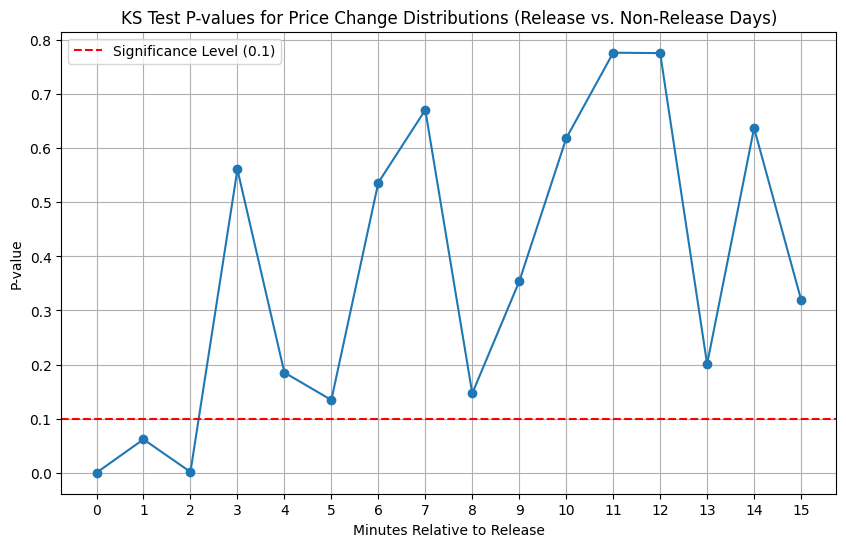

In [132]:
import matplotlib.pyplot as plt


# Assuming heatmap_data_non_release and heatmap_data_release are already defined as pandas DataFrames

# 1. Get Price Change Bin midpoints
price_change_bins_labels = heatmap_data_non_release.index
price_change_bins_midpoints = []
for label in price_change_bins_labels:
    lower_bound_str = label.split('%')[0]
    # Assuming bins are like '-1.00%' to '-0.95%', taking the lower bound as midpoint representative
    # For more accurate midpoint, you'd need to parse bin ranges if available instead of labels
    midpoint = float(lower_bound_str) / 100.0
    price_change_bins_midpoints.append(midpoint)
price_change_bins_midpoints = np.array(price_change_bins_midpoints)

# 2. Minutes to test (0 to 15)
minutes_to_test =pd.Series([float(m) for m in range(0, 16)]) # Convert to string to match column names
# 3. Store KS test results
ks_results = []

for minute in minutes_to_test:
    if minute not in heatmap_data_non_release.columns or minute not in heatmap_data_release.columns:
        print(f"Minute {minute} not found in both heatmaps. Skipping.")
        continue

    # Reconstruct samples for non-release data
    sample_non_release = []
    frequencies_non_release = heatmap_data_non_release[minute]
    for i, freq in enumerate(frequencies_non_release):
        sample_non_release.extend([price_change_bins_midpoints[i]] * freq)
    sample_non_release = np.array(sample_non_release)

    # Reconstruct samples for release data
    sample_release = []
    frequencies_release = heatmap_data_release[minute]
    for i, freq in enumerate(frequencies_release):
        sample_release.extend([price_change_bins_midpoints[i]] * freq)
    sample_release = np.array(sample_release)

    # Perform KS test if both samples are not empty
    if sample_non_release.size > 0 and sample_release.size > 0:
        ks_statistic, p_value = stats.ks_2samp(sample_non_release, sample_release)
        ks_results.append({
            'Minute': float(minute),
            'KS Statistic': ks_statistic,
            'P-value': p_value
        })
    else:
        ks_results.append({
            'Minute': float(minute),
            'KS Statistic': np.nan,
            'P-value': np.nan,
            'Warning': 'One or both samples are empty, KS test not performed.'
        })

# 4. Convert results to DataFrame for easier viewing
ks_results_df = pd.DataFrame(ks_results)
print(ks_results_df)

# 5. Optional: Plot p-values
plt.figure(figsize=(10, 6))
plt.plot(ks_results_df['Minute'], ks_results_df['P-value'], marker='o', linestyle='-')
plt.axhline(0.1, color='r', linestyle='--', label='Significance Level (0.1)')
plt.title('KS Test P-values for Price Change Distributions (Release vs. Non-Release Days)')
plt.xlabel('Minutes Relative to Release')
plt.ylabel('P-value')
plt.xticks(ks_results_df['Minute'])
plt.legend()
plt.grid(True)
plt.show()

Ah, a very pertinent question! The choice between a p-value cutoff of 0.05 and 0.1 (or any other value) is not arbitrary, and it hinges on understanding the trade-offs in hypothesis testing and the specific context of your analysis.  Let's delve into a justification for using a p-value of 0.1 instead of the more conventional 0.05 in your EIA WPSR crude oil surprise project.

**Justification for using a p-value cutoff of 0.1 (instead of 0.05):**

The decision to use a p-value cutoff of 0.1 is fundamentally about **balancing the risk of Type I error (false positive) and Type II error (false negative)** in your hypothesis testing framework.

Here's a breakdown of the rationale:

1.  **Increased Power and Reduced Risk of Type II Error (False Negatives):**

    *   **What is Type II Error?**  A Type II error occurs when you *fail to reject the null hypothesis when it is actually false*. In your context, this would mean concluding that there is *no statistically significant difference* in the price change distributions between release and non-release minutes, when in reality, a difference *does* exist. You'd be missing a real effect.
    *   **Why 0.1 increases power:** By raising the p-value threshold from 0.05 to 0.1, you are *increasing the power* of your test. Power is the probability of correctly rejecting the null hypothesis when it is false (i.e., avoiding a Type II error). A higher p-value cutoff makes it *easier* to reject the null hypothesis.
    *   **Relevance to Exploratory Analysis:**  If your project is in an **exploratory phase**, where you are trying to identify potential signals or effects of EIA releases, minimizing Type II errors can be more important than strictly controlling Type I errors. You might be willing to accept a slightly higher chance of a false positive (Type I error) to ensure you don't miss potentially real and interesting effects (Type II error).

2.  **Context of Financial Markets and Signal Detection:**

    *   **Noisy Data:** Financial market data, especially high-frequency data, is inherently noisy.  There are many factors influencing price movements beyond just EIA releases. Detecting statistically significant effects in such noisy environments can be challenging. Using a less stringent p-value cutoff might be necessary to detect signals that are genuinely present but are somewhat weak amidst the noise.
    *   **Economic Significance vs. Strict Statistical Significance:** In finance, sometimes an effect might be *economically significant* (i.e., practically important for trading or risk management) even if it doesn't reach a very strict statistical significance level like p < 0.05.  A p-value of 0.1 might indicate a potential effect worth further investigation, even if it's not a "slam dunk" in terms of statistical certainty at the 0.05 level.
    *   **Early Stage Signal Identification:** You might be using the KS test at this stage to *screen* for minutes where there *might* be a reaction to EIA releases.  Minutes showing p-values between 0.05 and 0.1 could be flagged for more in-depth analysis using other methods or focusing on different aspects (e.g., effect size, consistency across releases, economic implications).

3.  **Sample Size and Statistical Power Considerations:**

    *   **Limited Sample Size:** If you have a relatively limited number of EIA release events in your dataset, your statistical power might be inherently lower.  In situations with lower power, using a more lenient p-value cutoff can be a pragmatic way to increase the chance of detecting real effects that might be missed at the 0.05 level simply due to lack of statistical power.
    *   **Balancing Power and Type I Error:**  While increasing alpha (to 0.1) increases the risk of Type I error, it's a direct way to boost statistical power, especially when sample sizes are not very large.

4.  **Cost of Errors in Your Specific Project:**

    *   **Consider the Consequences of False Positives vs. False Negatives:**
        *   **Type I Error (False Positive at 0.1):**  You might conclude there's a difference in distributions at a particular minute when there isn't a real, consistent difference.  This might lead you to further investigate that minute, perhaps look at trading strategies based on it, which could turn out to be less effective than you initially thought. The "cost" might be some wasted research time.
        *   **Type II Error (False Negative at 0.05):** You might miss a genuine, albeit weaker, market reaction at a specific minute by using too strict a cutoff. This could mean overlooking a potentially valuable insight into market behavior around EIA releases. The "cost" could be missing a real effect and potentially underestimating the market's response.

    *   **In Exploratory Research, False Negatives Can Be More Costly:**  In the early stages of research, especially in a field like quantitative finance where identifying new signals is valuable, missing a real signal (Type II error) might be considered more detrimental than pursuing a few false leads (Type I errors).

**Important Caveats and Considerations when using p=0.1:**

*   **Transparency is Key:**  If you choose to use a p-value of 0.1, **be transparent and clearly state this choice in your report or analysis.** Explain your justification for using a less stringent cutoff. Don't present results as if they were significant at the 0.05 level if they are only significant at 0.1.
*   **Increased Type I Error Rate:**  Be aware that using p < 0.1 means you are accepting a 10% chance of making a Type I error for each test you perform. If you are conducting many tests, the overall probability of getting at least one false positive will increase. Consider corrections for multiple testing if you are performing many KS tests across different minutes (though for exploratory analysis, strict multiple testing corrections are sometimes relaxed).
*   **Confirmation is Important:**  If you find minutes that are "significant" at the p < 0.1 level, treat these as **potential signals that warrant further investigation, not definitive conclusions.**  Follow up with:
    *   **Visual Inspection:**  Carefully examine the distributions visually (histograms, CDFs) to understand the nature of the difference.
    *   **Robustness Checks:**  Test the finding on different datasets, time periods, or using different methodologies.
    *   **Economic Plausibility:**  Does the finding make sense from an economic or market microstructure perspective?

**In conclusion, using a p-value cutoff of 0.1 can be a justifiable choice in exploratory quantitative finance research, especially when:**

*   You are in a signal-seeking phase.
*   Minimizing Type II errors (false negatives) is prioritized over strictly controlling Type I errors.
*   Working with noisy financial market data.
*   Sample sizes are potentially limited, and statistical power might be a concern.

Just remember to be transparent about your choice, understand the implications for Type I error, and treat "significant" findings at this level as preliminary signals requiring further validation.

KS Test Results for Minute 0.0:
KS Statistic: 0.1082
P-value: 0.0000


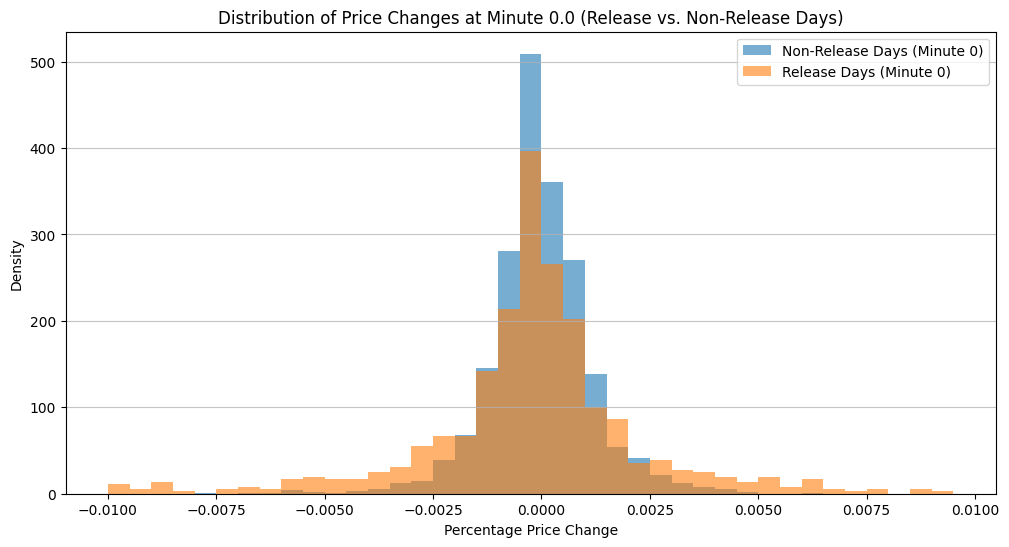

In [130]:

minute_to_test = 0.0  # Or '0' if your column name is just '0'

# 1. Get Price Change Bin midpoints (same as before)
price_change_bins_labels = heatmap_data_non_release.index
price_change_bins_midpoints = []
for label in price_change_bins_labels:
    lower_bound_str = label.split('%')[0]
    midpoint = float(lower_bound_str) / 100.0
    price_change_bins_midpoints.append(midpoint)
price_change_bins_midpoints = np.array(price_change_bins_midpoints)

# 2. Extract frequency distributions for minute 0
if minute_to_test not in heatmap_data_non_release.columns or minute_to_test not in heatmap_data_release.columns:
    print(f"Minute {minute_to_test} not found in both heatmaps. Cannot perform KS test.")
else:
    frequencies_non_release_minute_0 = heatmap_data_non_release[minute_to_test]
    frequencies_release_minute_0 = heatmap_data_release[minute_to_test]

    # 3. Reconstruct samples for minute 0
    sample_non_release_minute_0 = []
    for i, freq in enumerate(frequencies_non_release_minute_0):
        sample_non_release_minute_0.extend([price_change_bins_midpoints[i]] * freq)
    sample_non_release_minute_0 = np.array(sample_non_release_minute_0)

    sample_release_minute_0 = []
    for i, freq in enumerate(frequencies_release_minute_0):
        sample_release_minute_0.extend([price_change_bins_midpoints[i]] * freq)
    sample_release_minute_0 = np.array(sample_release_minute_0)

    # 4. Perform KS test if both samples are not empty
    if sample_non_release_minute_0.size > 0 and sample_release_minute_0.size > 0:
        ks_statistic, p_value = stats.ks_2samp(sample_non_release_minute_0, sample_release_minute_0)

        print(f"KS Test Results for Minute {minute_to_test}:")
        print(f"KS Statistic: {ks_statistic:.4f}")
        print(f"P-value: {p_value:.4f}")

        # 5. Optional: Visualize the distributions (Histograms)
        plt.figure(figsize=(12, 6))
        plt.hist(sample_non_release_minute_0, bins=price_change_bins_midpoints, alpha=0.6, label='Non-Release Days (Minute 0)', density=True)
        plt.hist(sample_release_minute_0, bins=price_change_bins_midpoints, alpha=0.6, label='Release Days (Minute 0)', density=True)
        plt.title(f'Distribution of Price Changes at Minute {minute_to_test} (Release vs. Non-Release Days)')
        plt.xlabel('Percentage Price Change')
        plt.ylabel('Density')
        plt.legend(loc='upper right')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

    else:
        print(f"Warning: One or both samples for Minute {minute_to_test} are empty. KS test not performed.")

Since the p-value seems to be below the chosen threshold (<0.1) until minute 2 we conclude that the EIA release takes around 2 minutes to be fully accounted for by market price.

In [138]:
display(min_WTI)
display(price_window_60min)
display(icom_eia_forecasts)

,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change
Datetime_CST,,,,,,,,,
2011-03-07 23:59:00-06:00,07/03/2011,23:59:00,104.74,104.77,104.73,104.73,18,2011-03-07 23:59:00,NaN
2011-03-08 00:00:00-06:00,08/03/2011,00:00:00,104.74,104.82,104.74,104.81,34,2011-03-08 00:00:00,0.076387
2011-03-08 00:01:00-06:00,08/03/2011,00:01:00,104.82,104.84,104.82,104.82,12,2011-03-08 00:01:00,0.009541
2011-03-08 00:02:00-06:00,08/03/2011,00:02:00,104.81,104.81,104.73,104.75,20,2011-03-08 00:02:00,-0.066781
2011-03-08 00:03:00-06:00,08/03/2011,00:03:00,104.74,104.76,104.71,104.76,25,2011-03-08 00:03:00,0.009547
...,...,...,...,...,...,...,...,...,...
2025-03-11 23:54:00-05:00,11/03/2025,23:54:00,66.75,66.75,66.75,66.75,13,2025-03-11 23:54:00,0.000000
2025-03-11 23:56:00-05:00,11/03/2025,23:56:00,66.75,66.75,66.74,66.74,3,2025-03-11 23:56:00,-0.014981
2025-03-11 23:58:00-05:00,11/03/2025,23:58:00,66.75,66.75,66.75,66.75,3,2025-03-11 23:58:00,0.014984


,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change,Release_Datetime,Time_to_Release_Minutes,Time_Delta_Minutes,Price_Change_Bin
Datetime_CST,,,,,,,,,,,,,
2011-03-09 08:30:00-06:00,09/03/2011,08:30:00,105.56,105.56,105.44,105.46,514,2011-03-09 08:30:00,-0.094733,2011-03-09 09:30:00-06:00,-60.0,-60.0,-0.10%
2011-03-09 08:31:00-06:00,09/03/2011,08:31:00,105.46,105.52,105.45,105.46,323,2011-03-09 08:31:00,0.000000,2011-03-09 09:30:00-06:00,-59.0,-59.0,-0.05%
2011-03-09 08:32:00-06:00,09/03/2011,08:32:00,105.45,105.47,105.31,105.32,899,2011-03-09 08:32:00,-0.132752,2011-03-09 09:30:00-06:00,-58.0,-58.0,-0.15%
2011-03-09 08:33:00-06:00,09/03/2011,08:33:00,105.31,105.37,105.25,105.33,716,2011-03-09 08:33:00,0.009495,2011-03-09 09:30:00-06:00,-57.0,-57.0,0.00%
2011-03-09 08:34:00-06:00,09/03/2011,08:34:00,105.34,105.45,105.31,105.40,660,2011-03-09 08:34:00,0.066458,2011-03-09 09:30:00-06:00,-56.0,-56.0,0.05%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-05 10:26:00-06:00,05/03/2025,10:26:00,65.42,65.46,65.37,65.38,713,2025-03-05 10:26:00,-0.061143,2025-03-05 09:30:00-06:00,56.0,56.0,-0.10%
2025-03-05 10:27:00-06:00,05/03/2025,10:27:00,65.37,65.41,65.37,65.39,640,2025-03-05 10:27:00,0.015295,2025-03-05 09:30:00-06:00,57.0,57.0,0.00%
2025-03-05 10:28:00-06:00,05/03/2025,10:28:00,65.40,65.42,65.33,65.36,796,2025-03-05 10:28:00,-0.045879,2025-03-05 09:30:00-06:00,58.0,58.0,-0.05%


,Release Date,Time,Actual,Forecast,Previous,Release_Datetime,Release_Datetime_EST,supply_surprise
Release_Datetime_CST,,,,,,,,
2011-03-09 09:30:00-06:00,9-Mar-11,10:30,2.500M,1.100M,-0.400M,2011-03-09 10:30:00,2011-03-09 10:30:00-05:00,1.400
2011-03-16 08:30:00-05:00,16-Mar-11,9:30,1.700M,1.800M,2.500M,2011-03-16 09:30:00,2011-03-16 09:30:00-04:00,-0.100
2011-03-23 08:30:00-05:00,23-Mar-11,9:30,2.100M,2.000M,1.700M,2011-03-23 09:30:00,2011-03-23 09:30:00-04:00,0.100
2011-03-30 08:30:00-05:00,30-Mar-11,9:30,2.900M,2.000M,2.100M,2011-03-30 09:30:00,2011-03-30 09:30:00-04:00,0.900
2011-04-06 08:30:00-05:00,6-Apr-11,9:30,2.000M,1.300M,2.900M,2011-04-06 09:30:00,2011-04-06 09:30:00-04:00,0.700
...,...,...,...,...,...,...,...,...
2025-02-12 09:30:00-06:00,12-Feb-25,10:30,4.070M,2.400M,8.664M,2025-02-12 10:30:00,2025-02-12 10:30:00-05:00,1.670
2025-02-20 11:00:00-06:00,20-Feb-25,12:00,4.633M,3.200M,4.070M,2025-02-20 12:00:00,2025-02-20 12:00:00-05:00,1.433
2025-02-26 09:00:00-06:00,26-Feb-25,10:00,-2.332M,2.500M,4.633M,2025-02-26 10:00:00,2025-02-26 10:00:00-05:00,-4.832


In [147]:
price_window_0to2min = price_window_60min[
    (price_window_60min['Time_Delta_Minutes'] >= 0.0) & (price_window_60min['Time_Delta_Minutes'] <= 2.0)
]

# Display the head of the new DataFrame to verify the filtering
display(price_window_0to2min)

# Optionally, display the shape to see how many rows were filtered
print(f"\nShape of the original DataFrame: {price_window_60min.shape}")
print(f"Shape of the filtered DataFrame (Time_Delta_Minutes 0 to 2): {price_window_0to2min.shape}")

,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change,Release_Datetime,Time_to_Release_Minutes,Time_Delta_Minutes,Price_Change_Bin
Datetime_CST,,,,,,,,,,,,,
2011-03-09 09:30:00-06:00,09/03/2011,09:30:00,105.24,105.43,105.07,105.33,2458,2011-03-09 09:30:00,0.190241,2011-03-09 09:30:00-06:00,0.0,0.0,0.15%
2011-03-09 09:31:00-06:00,09/03/2011,09:31:00,105.33,105.48,105.21,105.36,2052,2011-03-09 09:31:00,0.028482,2011-03-09 09:30:00-06:00,1.0,1.0,0.00%
2011-03-09 09:32:00-06:00,09/03/2011,09:32:00,105.37,105.45,105.31,105.34,1250,2011-03-09 09:32:00,-0.018983,2011-03-09 09:30:00-06:00,2.0,2.0,-0.05%
2011-03-16 08:30:00-05:00,16/03/2011,08:30:00,98.40,98.44,98.28,98.44,588,2011-03-16 08:30:00,0.060988,2011-03-16 08:30:00-05:00,0.0,0.0,0.05%
2011-03-16 08:31:00-05:00,16/03/2011,08:31:00,98.44,98.55,98.44,98.48,473,2011-03-16 08:31:00,0.040634,2011-03-16 08:30:00-05:00,1.0,1.0,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-26 09:01:00-06:00,26/02/2025,09:01:00,68.99,69.05,68.99,69.03,349,2025-02-26 09:01:00,0.043478,2025-02-26 09:00:00-06:00,1.0,1.0,0.00%
2025-02-26 09:02:00-06:00,26/02/2025,09:02:00,69.03,69.10,69.03,69.05,384,2025-02-26 09:02:00,0.028973,2025-02-26 09:00:00-06:00,2.0,2.0,0.00%
2025-03-05 09:30:00-06:00,05/03/2025,09:30:00,66.21,66.32,66.10,66.22,940,2025-03-05 09:30:00,0.000000,2025-03-05 09:30:00-06:00,0.0,0.0,-0.05%



Shape of the original DataFrame: (88344, 13)
Shape of the filtered DataFrame (Time_Delta_Minutes 0 to 2): (2193, 13)


In [149]:
merged_price_window_0to2min = pd.merge(
    price_window_0to2min.reset_index(),
    icom_eia_forecasts.reset_index()[['Release_Datetime_CST', 'supply_surprise', 'Actual', 'Forecast', 'Previous']], # Select only necessary columns from icom_eia_forecasts
    left_on='Release_Datetime',
    right_on='Release_Datetime_CST',
    how='left' # Left join to keep all rows from price_window_0to2min
)

# Drop the redundant 'Release_Datetime_CST' column after merging (optional)
merged_price_window_0to2min = merged_price_window_0to2min.drop(columns=['Release_Datetime_CST'])

# Display the head of the merged dataframe to verify
display(merged_price_window_0to2min)


,Datetime_CST,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change,Release_Datetime,Time_to_Release_Minutes,Time_Delta_Minutes,Price_Change_Bin,supply_surprise,Actual,Forecast,Previous
0,2011-03-09 09:30:00-06:00,09/03/2011,09:30:00,105.24,105.43,105.07,105.33,2458,2011-03-09 09:30:00,0.190241,2011-03-09 09:30:00-06:00,0.0,0.0,0.15%,1.400,2.500M,1.100M,-0.400M
1,2011-03-09 09:31:00-06:00,09/03/2011,09:31:00,105.33,105.48,105.21,105.36,2052,2011-03-09 09:31:00,0.028482,2011-03-09 09:30:00-06:00,1.0,1.0,0.00%,1.400,2.500M,1.100M,-0.400M
2,2011-03-09 09:32:00-06:00,09/03/2011,09:32:00,105.37,105.45,105.31,105.34,1250,2011-03-09 09:32:00,-0.018983,2011-03-09 09:30:00-06:00,2.0,2.0,-0.05%,1.400,2.500M,1.100M,-0.400M
3,2011-03-16 08:30:00-05:00,16/03/2011,08:30:00,98.40,98.44,98.28,98.44,588,2011-03-16 08:30:00,0.060988,2011-03-16 08:30:00-05:00,0.0,0.0,0.05%,-0.100,1.700M,1.800M,2.500M
4,2011-03-16 08:31:00-05:00,16/03/2011,08:31:00,98.44,98.55,98.44,98.48,473,2011-03-16 08:31:00,0.040634,2011-03-16 08:30:00-05:00,1.0,1.0,0.00%,-0.100,1.700M,1.800M,2.500M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2025-02-26 09:01:00-06:00,26/02/2025,09:01:00,68.99,69.05,68.99,69.03,349,2025-02-26 09:01:00,0.043478,2025-02-26 09:00:00-06:00,1.0,1.0,0.00%,-4.832,-2.332M,2.500M,4.633M
2189,2025-02-26 09:02:00-06:00,26/02/2025,09:02:00,69.03,69.10,69.03,69.05,384,2025-02-26 09:02:00,0.028973,2025-02-26 09:00:00-06:00,2.0,2.0,0.00%,-4.832,-2.332M,2.500M,4.633M
2190,2025-03-05 09:30:00-06:00,05/03/2025,09:30:00,66.21,66.32,66.10,66.22,940,2025-03-05 09:30:00,0.000000,2025-03-05 09:30:00-06:00,0.0,0.0,-0.05%,3.014,3.614M,0.600M,-2.332M
2191,2025-03-05 09:31:00-06:00,05/03/2025,09:31:00,66.22,66.32,66.22,66.25,644,2025-03-05 09:31:00,0.045304,2025-03-05 09:30:00-06:00,1.0,1.0,0.00%,3.014,3.614M,0.600M,-2.332M


In [181]:
display(fxstreet_api_forecasts)

display(merged_price_window_0to2min)
merged_price_window_0to2min['Date'] = str(merged_price_window_0to2min['Date'])
display(merged_price_window_0to2min.dtypes)

,Date,Actual,Dev,Cons,Date_Formatted
0,03/04/2025 (Feb 28),-1.455,-0.36,-0.30,04/03/2025
1,02/25/2025 (Feb 21),-0.640,NaN,NaN,25/02/2025
2,02/19/2025 (Feb 14),3.340,0.36,2.20,19/02/2025
3,02/11/2025 (Feb 7),9.043,2.64,2.80,11/02/2025
4,02/04/2025 (Jan 31),5.025,0.79,3.17,04/02/2025
...,...,...,...,...,...
500,8/4/2015,-2.400,NaN,NaN,04/08/2015
501,7/28/2015,-1.900,NaN,NaN,28/07/2015
502,7/21/2015,2.300,NaN,NaN,21/07/2015
503,7/14/2015,-7.300,NaN,NaN,14/07/2015


,Datetime_CST,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change,Release_Datetime,Time_to_Release_Minutes,Time_Delta_Minutes,Price_Change_Bin,supply_surprise,Actual,Forecast,Previous
0,2011-03-09 09:30:00-06:00,0 0 09/03/2011\n1 09/03/2011...,09:30:00,105.24,105.43,105.07,105.33,2458,2011-03-09 09:30:00,0.190241,2011-03-09 09:30:00-06:00,0.0,0.0,0.15%,1.400,2.500M,1.100M,-0.400M
1,2011-03-09 09:31:00-06:00,0 0 09/03/2011\n1 09/03/2011...,09:31:00,105.33,105.48,105.21,105.36,2052,2011-03-09 09:31:00,0.028482,2011-03-09 09:30:00-06:00,1.0,1.0,0.00%,1.400,2.500M,1.100M,-0.400M
2,2011-03-09 09:32:00-06:00,0 0 09/03/2011\n1 09/03/2011...,09:32:00,105.37,105.45,105.31,105.34,1250,2011-03-09 09:32:00,-0.018983,2011-03-09 09:30:00-06:00,2.0,2.0,-0.05%,1.400,2.500M,1.100M,-0.400M
3,2011-03-16 08:30:00-05:00,0 0 09/03/2011\n1 09/03/2011...,08:30:00,98.40,98.44,98.28,98.44,588,2011-03-16 08:30:00,0.060988,2011-03-16 08:30:00-05:00,0.0,0.0,0.05%,-0.100,1.700M,1.800M,2.500M
4,2011-03-16 08:31:00-05:00,0 0 09/03/2011\n1 09/03/2011...,08:31:00,98.44,98.55,98.44,98.48,473,2011-03-16 08:31:00,0.040634,2011-03-16 08:30:00-05:00,1.0,1.0,0.00%,-0.100,1.700M,1.800M,2.500M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2025-02-26 09:01:00-06:00,0 0 09/03/2011\n1 09/03/2011...,09:01:00,68.99,69.05,68.99,69.03,349,2025-02-26 09:01:00,0.043478,2025-02-26 09:00:00-06:00,1.0,1.0,0.00%,-4.832,-2.332M,2.500M,4.633M
2189,2025-02-26 09:02:00-06:00,0 0 09/03/2011\n1 09/03/2011...,09:02:00,69.03,69.10,69.03,69.05,384,2025-02-26 09:02:00,0.028973,2025-02-26 09:00:00-06:00,2.0,2.0,0.00%,-4.832,-2.332M,2.500M,4.633M
2190,2025-03-05 09:30:00-06:00,0 0 09/03/2011\n1 09/03/2011...,09:30:00,66.21,66.32,66.10,66.22,940,2025-03-05 09:30:00,0.000000,2025-03-05 09:30:00-06:00,0.0,0.0,-0.05%,3.014,3.614M,0.600M,-2.332M
2191,2025-03-05 09:31:00-06:00,0 0 09/03/2011\n1 09/03/2011...,09:31:00,66.22,66.32,66.22,66.25,644,2025-03-05 09:31:00,0.045304,2025-03-05 09:30:00-06:00,1.0,1.0,0.00%,3.014,3.614M,0.600M,-2.332M


Datetime_CST               datetime64[ns, America/Chicago]
Date                                                object
Time                                                object
Open                                               float64
High                                               float64
Low                                                float64
Close                                              float64
Volume                                               int64
Datetime                                    datetime64[ns]
Percent_Change                                     float64
Release_Datetime           datetime64[ns, America/Chicago]
Time_to_Release_Minutes                            float64
Time_Delta_Minutes                                 float64
Price_Change_Bin                                  category
supply_surprise                                    float64
Actual                                              object
Forecast                                            obje

In [190]:
date_string_series = merged_price_window_0to2min['Datetime_CST'].dt.strftime('%d/%m/%Y')
merged_price_window_0to2min['Date'] = date_string_series
display(merged_price_window_0to2min)
display(merged_price_window_0to2min.dtypes)

,Datetime_CST,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change,Release_Datetime,Time_to_Release_Minutes,Time_Delta_Minutes,Price_Change_Bin,supply_surprise,Actual,Forecast,Previous,DateString
0,2011-03-09 09:30:00-06:00,09/03/2011,09:30:00,105.24,105.43,105.07,105.33,2458,2011-03-09 09:30:00,0.190241,2011-03-09 09:30:00-06:00,0.0,0.0,0.15%,1.400,2.500M,1.100M,-0.400M,09/03/2011
1,2011-03-09 09:31:00-06:00,09/03/2011,09:31:00,105.33,105.48,105.21,105.36,2052,2011-03-09 09:31:00,0.028482,2011-03-09 09:30:00-06:00,1.0,1.0,0.00%,1.400,2.500M,1.100M,-0.400M,09/03/2011
2,2011-03-09 09:32:00-06:00,09/03/2011,09:32:00,105.37,105.45,105.31,105.34,1250,2011-03-09 09:32:00,-0.018983,2011-03-09 09:30:00-06:00,2.0,2.0,-0.05%,1.400,2.500M,1.100M,-0.400M,09/03/2011
3,2011-03-16 08:30:00-05:00,16/03/2011,08:30:00,98.40,98.44,98.28,98.44,588,2011-03-16 08:30:00,0.060988,2011-03-16 08:30:00-05:00,0.0,0.0,0.05%,-0.100,1.700M,1.800M,2.500M,16/03/2011
4,2011-03-16 08:31:00-05:00,16/03/2011,08:31:00,98.44,98.55,98.44,98.48,473,2011-03-16 08:31:00,0.040634,2011-03-16 08:30:00-05:00,1.0,1.0,0.00%,-0.100,1.700M,1.800M,2.500M,16/03/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2025-02-26 09:01:00-06:00,26/02/2025,09:01:00,68.99,69.05,68.99,69.03,349,2025-02-26 09:01:00,0.043478,2025-02-26 09:00:00-06:00,1.0,1.0,0.00%,-4.832,-2.332M,2.500M,4.633M,26/02/2025
2189,2025-02-26 09:02:00-06:00,26/02/2025,09:02:00,69.03,69.10,69.03,69.05,384,2025-02-26 09:02:00,0.028973,2025-02-26 09:00:00-06:00,2.0,2.0,0.00%,-4.832,-2.332M,2.500M,4.633M,26/02/2025
2190,2025-03-05 09:30:00-06:00,05/03/2025,09:30:00,66.21,66.32,66.10,66.22,940,2025-03-05 09:30:00,0.000000,2025-03-05 09:30:00-06:00,0.0,0.0,-0.05%,3.014,3.614M,0.600M,-2.332M,05/03/2025
2191,2025-03-05 09:31:00-06:00,05/03/2025,09:31:00,66.22,66.32,66.22,66.25,644,2025-03-05 09:31:00,0.045304,2025-03-05 09:30:00-06:00,1.0,1.0,0.00%,3.014,3.614M,0.600M,-2.332M,05/03/2025


Datetime_CST               datetime64[ns, America/Chicago]
Date                                                object
Time                                                object
Open                                               float64
High                                               float64
Low                                                float64
Close                                              float64
Volume                                               int64
Datetime                                    datetime64[ns]
Percent_Change                                     float64
Release_Datetime           datetime64[ns, America/Chicago]
Time_to_Release_Minutes                            float64
Time_Delta_Minutes                                 float64
Price_Change_Bin                                  category
supply_surprise                                    float64
Actual                                              object
Forecast                                            obje

In [212]:

def format_fxstreet_date(date_str):
    """
    Extracts the date part from the fxstreet date string and formats it as day/month/year.

    Args:
        date_str (str): The original date string from the 'Date' column.

    Returns:
        str: Formatted date string in day/month/year format (e.g., "04/03/2025").
             Returns original string if formatting fails.
    """
    try:
        # Split the string at the '(' to isolate the date part
        date_part = date_str.split('(')[0].strip()
        # Convert the extracted date part to datetime object
        datetime_obj = pd.to_datetime(date_part, format='%m/%d/%Y') # Assuming month/day/year format, adjust if needed
        # Format the datetime object as day/month/year string
        formatted_date_str = datetime_obj.strftime('%d/%m/%Y')
        return formatted_date_str
    except Exception as e:
        print(f"Error formatting date string: {date_str} - {e}")
        return date_str # Return original string in case of error

# 2. Apply the formatting function to the 'Date' column
fxstreet_api_forecasts['Date_Formatted'] = fxstreet_api_forecasts['Date'].apply(format_fxstreet_date)


display(fxstreet_api_forecasts)
display(fxstreet_api_forecasts.dtypes)

,Date,Actual,Dev,Cons,Date_Formatted,Actual_API
0,03/04/2025 (Feb 28),-1.455,-0.36,-0.30,04/03/2025,-1.455
1,02/25/2025 (Feb 21),-0.640,NaN,NaN,25/02/2025,-0.640
2,02/19/2025 (Feb 14),3.340,0.36,2.20,19/02/2025,3.340
3,02/11/2025 (Feb 7),9.043,2.64,2.80,11/02/2025,9.043
4,02/04/2025 (Jan 31),5.025,0.79,3.17,04/02/2025,5.025
...,...,...,...,...,...,...
500,8/4/2015,-2.400,NaN,NaN,04/08/2015,-2.400
501,7/28/2015,-1.900,NaN,NaN,28/07/2015,-1.900
502,7/21/2015,2.300,NaN,NaN,21/07/2015,2.300
503,7/14/2015,-7.300,NaN,NaN,14/07/2015,-7.300


Date               object
Actual            float64
Dev               float64
Cons              float64
Date_Formatted     object
Actual_API        float64
dtype: object

In [215]:
#fxstreet_api_forecasts['Actual_API'] = fxstreet_api_forecasts['Actual']
fxstreet_api_forecasts['Date_Formatted'] = pd.to_datetime(fxstreet_api_forecasts['Date_Formatted'], format='%d/%m/%Y').dt.date
fxstreet_api_forecasts['Actual_API'] = fxstreet_api_forecasts['Actual_API'].astype('float')
display(fxstreet_api_forecasts)
display(fxstreet_api_forecasts.dtypes)
display(merged_price_window_0to2min)

,Date,Actual,Dev,Cons,Date_Formatted,Actual_API
0,03/04/2025 (Feb 28),-1.455,-0.36,-0.30,2025-03-04,-1.455
1,02/25/2025 (Feb 21),-0.640,NaN,NaN,2025-02-25,-0.640
2,02/19/2025 (Feb 14),3.340,0.36,2.20,2025-02-19,3.340
3,02/11/2025 (Feb 7),9.043,2.64,2.80,2025-02-11,9.043
4,02/04/2025 (Jan 31),5.025,0.79,3.17,2025-02-04,5.025
...,...,...,...,...,...,...
500,8/4/2015,-2.400,NaN,NaN,2015-08-04,-2.400
501,7/28/2015,-1.900,NaN,NaN,2015-07-28,-1.900
502,7/21/2015,2.300,NaN,NaN,2015-07-21,2.300
503,7/14/2015,-7.300,NaN,NaN,2015-07-14,-7.300


Date               object
Actual            float64
Dev               float64
Cons              float64
Date_Formatted     object
Actual_API        float64
dtype: object

,Datetime_CST,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change,Release_Datetime,Time_to_Release_Minutes,Time_Delta_Minutes,Price_Change_Bin,supply_surprise,Actual,Forecast,Previous,DateString
0,2011-03-09 09:30:00-06:00,09/03/2011,09:30:00,105.24,105.43,105.07,105.33,2458,2011-03-09 09:30:00,0.190241,2011-03-09 09:30:00-06:00,0.0,0.0,0.15%,1.400,2.500M,1.100M,-0.400M,09/03/2011
1,2011-03-09 09:31:00-06:00,09/03/2011,09:31:00,105.33,105.48,105.21,105.36,2052,2011-03-09 09:31:00,0.028482,2011-03-09 09:30:00-06:00,1.0,1.0,0.00%,1.400,2.500M,1.100M,-0.400M,09/03/2011
2,2011-03-09 09:32:00-06:00,09/03/2011,09:32:00,105.37,105.45,105.31,105.34,1250,2011-03-09 09:32:00,-0.018983,2011-03-09 09:30:00-06:00,2.0,2.0,-0.05%,1.400,2.500M,1.100M,-0.400M,09/03/2011
3,2011-03-16 08:30:00-05:00,16/03/2011,08:30:00,98.40,98.44,98.28,98.44,588,2011-03-16 08:30:00,0.060988,2011-03-16 08:30:00-05:00,0.0,0.0,0.05%,-0.100,1.700M,1.800M,2.500M,16/03/2011
4,2011-03-16 08:31:00-05:00,16/03/2011,08:31:00,98.44,98.55,98.44,98.48,473,2011-03-16 08:31:00,0.040634,2011-03-16 08:30:00-05:00,1.0,1.0,0.00%,-0.100,1.700M,1.800M,2.500M,16/03/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2025-02-26 09:01:00-06:00,26/02/2025,09:01:00,68.99,69.05,68.99,69.03,349,2025-02-26 09:01:00,0.043478,2025-02-26 09:00:00-06:00,1.0,1.0,0.00%,-4.832,-2.332M,2.500M,4.633M,26/02/2025
2189,2025-02-26 09:02:00-06:00,26/02/2025,09:02:00,69.03,69.10,69.03,69.05,384,2025-02-26 09:02:00,0.028973,2025-02-26 09:00:00-06:00,2.0,2.0,0.00%,-4.832,-2.332M,2.500M,4.633M,26/02/2025
2190,2025-03-05 09:30:00-06:00,05/03/2025,09:30:00,66.21,66.32,66.10,66.22,940,2025-03-05 09:30:00,0.000000,2025-03-05 09:30:00-06:00,0.0,0.0,-0.05%,3.014,3.614M,0.600M,-2.332M,05/03/2025
2191,2025-03-05 09:31:00-06:00,05/03/2025,09:31:00,66.22,66.32,66.22,66.25,644,2025-03-05 09:31:00,0.045304,2025-03-05 09:30:00-06:00,1.0,1.0,0.00%,3.014,3.614M,0.600M,-2.332M,05/03/2025


In [222]:

merged_price_window_0to2min['DateString'] = pd.to_datetime(merged_price_window_0to2min['DateString'], format='%d/%m/%Y')
fxstreet_api_forecasts['Date_Formatted'] = pd.to_datetime(fxstreet_api_forecasts['Date_Formatted'], format='%d/%m/%Y')

def find_nearest_date_api(row, fxstreet_api_forecasts_dates):
    """
    Finds the Actual_API value from fxstreet_api_forecasts corresponding to the nearest date
    to the DateString in the given row.

    Args:
        row (pd.Series): A row from merged_price_window_0to2min DataFrame.
        fxstreet_api_forecasts_dates (pd.Series): The Date_Formatted column from fxstreet_api_forecasts.

    Returns:
        float: The Actual_API value corresponding to the nearest date, or NaN if no match.
    """
    date_to_match = row['DateString']

    # Calculate the absolute time difference between date_to_match and all dates in fxstreet_api_forecasts_dates
    time_diffs = abs(fxstreet_api_forecasts_dates - date_to_match)

    # Find the index of the minimum time difference
    nearest_date_index = time_diffs.idxmin()

    return fxstreet_api_forecasts['Actual_API'].iloc[nearest_date_index]


# Apply the function to each row of merged_price_window_0to2min to find the nearest API forecast
merged_price_window_0to2min_api = merged_price_window_0to2min.copy() # Create a copy to avoid modifying original
merged_price_window_0to2min_api['Actual_API'] = merged_price_window_0to2min_api.apply(
    find_nearest_date_api,
    axis=1,
    args=(fxstreet_api_forecasts['Date_Formatted'],)
)

merged_price_window_0to2min_api = merged_price_window_0to2min_api[678:] #the fxstreet API data only covers from 2015 till present
# Display the head of the merged dataframe to verify
display(merged_price_window_0to2min_api)
display(merged_price_window_0to2min_api.dtypes)

,Datetime_CST,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change,Release_Datetime,Time_to_Release_Minutes,Time_Delta_Minutes,Price_Change_Bin,supply_surprise,Actual,Forecast,Previous,DateString,Actual_API
678,2015-07-08 08:30:00-05:00,08/07/2015,08:30:00,52.55,52.58,52.49,52.51,817,2015-07-08 08:30:00,-0.076118,2015-07-08 08:30:00-05:00,0.0,0.0,-0.10%,1.084,0.384M,-0.700M,2.386M,2015-07-08,-0.958
679,2015-07-08 08:31:00-05:00,08/07/2015,08:31:00,52.50,52.55,52.48,52.53,630,2015-07-08 08:31:00,0.038088,2015-07-08 08:30:00-05:00,1.0,1.0,0.00%,1.084,0.384M,-0.700M,2.386M,2015-07-08,-0.958
680,2015-07-08 08:32:00-05:00,08/07/2015,08:32:00,52.53,52.53,52.46,52.48,498,2015-07-08 08:32:00,-0.095184,2015-07-08 08:30:00-05:00,2.0,2.0,-0.10%,1.084,0.384M,-0.700M,2.386M,2015-07-08,-0.958
681,2015-07-15 08:30:00-05:00,15/07/2015,08:30:00,52.23,52.36,52.18,52.36,1327,2015-07-15 08:30:00,0.248899,2015-07-15 08:30:00-05:00,0.0,0.0,0.20%,-3.188,-4.346M,-1.158M,0.384M,2015-07-15,-7.300
682,2015-07-15 08:31:00-05:00,15/07/2015,08:31:00,52.34,52.34,52.25,52.28,704,2015-07-15 08:31:00,-0.152788,2015-07-15 08:30:00-05:00,1.0,1.0,-0.20%,-3.188,-4.346M,-1.158M,0.384M,2015-07-15,-7.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2025-02-26 09:01:00-06:00,26/02/2025,09:01:00,68.99,69.05,68.99,69.03,349,2025-02-26 09:01:00,0.043478,2025-02-26 09:00:00-06:00,1.0,1.0,0.00%,-4.832,-2.332M,2.500M,4.633M,2025-02-26,-0.640
2189,2025-02-26 09:02:00-06:00,26/02/2025,09:02:00,69.03,69.10,69.03,69.05,384,2025-02-26 09:02:00,0.028973,2025-02-26 09:00:00-06:00,2.0,2.0,0.00%,-4.832,-2.332M,2.500M,4.633M,2025-02-26,-0.640
2190,2025-03-05 09:30:00-06:00,05/03/2025,09:30:00,66.21,66.32,66.10,66.22,940,2025-03-05 09:30:00,0.000000,2025-03-05 09:30:00-06:00,0.0,0.0,-0.05%,3.014,3.614M,0.600M,-2.332M,2025-03-05,-1.455
2191,2025-03-05 09:31:00-06:00,05/03/2025,09:31:00,66.22,66.32,66.22,66.25,644,2025-03-05 09:31:00,0.045304,2025-03-05 09:30:00-06:00,1.0,1.0,0.00%,3.014,3.614M,0.600M,-2.332M,2025-03-05,-1.455


Datetime_CST               datetime64[ns, America/Chicago]
Date                                                object
Time                                                object
Open                                               float64
High                                               float64
Low                                                float64
Close                                              float64
Volume                                               int64
Datetime                                    datetime64[ns]
Percent_Change                                     float64
Release_Datetime           datetime64[ns, America/Chicago]
Time_to_Release_Minutes                            float64
Time_Delta_Minutes                                 float64
Price_Change_Bin                                  category
supply_surprise                                    float64
Actual                                              object
Forecast                                            obje

In [ ]:

# 1. Group by 'Date'
grouped_by_date = merged_price_window_0to2min.groupby('Date')

# 2. Initialize a list to store results
date_percentage_changes = []

# 3. Iterate through each group (date)
for date, group_df in grouped_by_date:
    # Find the earliest Datetime_CST and its Close price
    earliest_minute_row = group_df.sort_values(by='Datetime_CST').iloc[0]
    earliest_close_price = earliest_minute_row['Close']

    # Find the latest Datetime_CST and its Close price
    latest_minute_row = group_df.sort_values(by='Datetime_CST').iloc[-1]
    latest_close_price = latest_minute_row['Close']

    # Calculate percentage price change
    if earliest_close_price != 0:  # Avoid division by zero
        percentage_change = ((latest_close_price - earliest_close_price) / earliest_close_price) * 100.0
    else:
        percentage_change = float('nan')  # Handle case where earliest price is zero

    # Append results to the list
    date_percentage_changes.append({
        'Date': date,
        'Start_Datetime': earliest_minute_row['Datetime_CST'],
        'End_Datetime': latest_minute_row['Datetime_CST'],
        'Start_Price': earliest_close_price,
        'End_Price': latest_close_price,
        'Percentage_Change_0to2min': percentage_change,
        'supply_surprise': earliest_minute_row['supply_surprise'], # Take supply surprise from the earliest minute row (should be consistent for the date)
        'Actual' : float(str(earliest_minute_row['Actual']).replace('M', '')),
        'Forecast' : float(str(earliest_minute_row['Forecast']).replace('M', '')),
        'Previous' : float(str(earliest_minute_row['Previous']).replace('M', ''))
    })

# 4. Create a new DataFrame from the results list
date_percentage_change_df = pd.DataFrame(date_percentage_changes)

# Display the new DataFrame
display(date_percentage_change_df)

,Date,Start_Datetime,End_Datetime,Start_Price,End_Price,Percentage_Change_0to2min,supply_surprise,Actual,Forecast,Previous
0,01/02/2012,2012-02-01 09:30:00-06:00,2012-02-01 09:32:00-06:00,98.47,98.44,-0.030466,1.200,4.200,3.000,3.600
1,01/02/2017,2017-02-01 09:30:00-06:00,2017-02-01 09:32:00-06:00,53.04,53.09,0.094268,3.177,6.466,3.289,2.840
2,01/02/2023,2023-02-01 09:30:00-06:00,2023-02-01 09:32:00-06:00,78.46,78.75,0.369615,3.764,4.140,0.376,0.533
3,01/03/2017,2017-03-01 09:30:00-06:00,2017-03-01 09:32:00-06:00,54.35,54.31,-0.073597,-1.578,1.501,3.079,0.564
4,01/03/2023,2023-03-01 09:30:00-06:00,2023-03-01 09:32:00-06:00,76.86,77.05,0.247203,0.708,1.165,0.457,7.648
...,...,...,...,...,...,...,...,...,...,...
724,31/08/2011,2011-08-31 08:30:00-05:00,2011-08-31 08:32:00-05:00,88.35,88.47,0.135823,4.400,5.300,0.900,-2.200
725,31/08/2016,2016-08-31 08:30:00-05:00,2016-08-31 08:32:00-05:00,45.85,45.90,0.109051,1.355,2.276,0.921,2.501
726,31/08/2022,2022-08-31 08:30:00-05:00,2022-08-31 08:32:00-05:00,89.63,89.52,-0.122727,-1.843,-3.326,-1.483,-3.282
727,31/10/2018,2018-10-31 08:30:00-05:00,2018-10-31 08:32:00-05:00,65.98,65.99,0.015156,-0.893,3.217,4.110,6.346


In [225]:
# 1. Group by 'Date'
grouped_by_date_api = merged_price_window_0to2min_api.groupby('Date')

# 2. Initialize a list to store results
date_percentage_changes_api = []

# 3. Iterate through each group (date)
for date, group_df in grouped_by_date_api:
    # Find the earliest Datetime_CST and its Close price
    earliest_minute_row = group_df.sort_values(by='Datetime_CST').iloc[0]
    earliest_close_price = earliest_minute_row['Close']

    # Find the latest Datetime_CST and its Close price
    latest_minute_row = group_df.sort_values(by='Datetime_CST').iloc[-1]
    latest_close_price = latest_minute_row['Close']

    # Calculate percentage price change
    if earliest_close_price != 0:  # Avoid division by zero
        percentage_change = ((latest_close_price - earliest_close_price) / earliest_close_price) * 100.0
    else:
        percentage_change = float('nan')  # Handle case where earliest price is zero

    # Append results to the list
    date_percentage_changes_api.append({
        'Date': date,
        'Start_Datetime': earliest_minute_row['Datetime_CST'],
        'End_Datetime': latest_minute_row['Datetime_CST'],
        'Start_Price': earliest_close_price,
        'End_Price': latest_close_price,
        'Percentage_Change_0to2min': percentage_change,
        'supply_surprise': float(str(earliest_minute_row['Actual']).replace('M', '')) - earliest_minute_row['Actual_API'], # Take supply surprise from the earliest minute row (should be consistent for the date)
        'Actual_API' : earliest_minute_row['Actual_API'],
        'Actual_EIA' : earliest_minute_row['Actual']
    })

# 4. Create a new DataFrame from the results list
date_percentage_change_df_api = pd.DataFrame(date_percentage_changes_api)

# Display the new DataFrame
display(date_percentage_change_df_api)

,Date,Start_Datetime,End_Datetime,Start_Price,End_Price,Percentage_Change_0to2min,supply_surprise,Actual_API,Actual_EIA
0,01/02/2017,2017-02-01 09:30:00-06:00,2017-02-01 09:32:00-06:00,53.04,53.09,0.094268,0.666,5.800,6.466M
1,01/02/2023,2023-02-01 09:30:00-06:00,2023-02-01 09:32:00-06:00,78.46,78.75,0.369615,-2.190,6.330,4.140M
2,01/03/2017,2017-03-01 09:30:00-06:00,2017-03-01 09:32:00-06:00,54.35,54.31,-0.073597,-0.999,2.500,1.501M
3,01/03/2023,2023-03-01 09:30:00-06:00,2023-03-01 09:32:00-06:00,76.86,77.05,0.247203,-5.038,6.203,1.165M
4,01/04/2020,2020-04-01 08:30:00-05:00,2020-04-01 08:32:00-05:00,20.37,20.30,-0.343643,3.349,10.485,13.834M
...,...,...,...,...,...,...,...,...,...
498,31/07/2019,2019-07-31 08:30:00-05:00,2019-07-31 08:32:00-05:00,58.65,58.60,-0.085251,-2.472,-6.024,-8.496M
499,31/07/2024,2024-07-31 08:30:00-05:00,2024-07-31 08:32:00-05:00,76.01,76.13,0.157874,1.059,-4.495,-3.436M
500,31/08/2016,2016-08-31 08:30:00-05:00,2016-08-31 08:32:00-05:00,45.85,45.90,0.109051,1.334,0.942,2.276M
501,31/08/2022,2022-08-31 08:30:00-05:00,2022-08-31 08:32:00-05:00,89.63,89.52,-0.122727,-3.919,0.593,-3.326M


In [226]:
date_percentage_change_df_api_sorted = date_percentage_change_df_api.sort_values(by='supply_surprise')

# Assuming date_percentage_change_df is already created and 'Start_Datetime' is a datetime column

# 1. Convert 'Start_Datetime' to datetime objects (ensure it's datetime)
date_percentage_change_df_api_sorted['Start_Datetime'] = pd.to_datetime(date_percentage_change_df_api_sorted['Start_Datetime'])

# 2. Calculate a numerical time representation for even color distribution
min_datetime = date_percentage_change_df_api_sorted['Start_Datetime'].min()
max_datetime = date_percentage_change_df_api_sorted['Start_Datetime'].max()

# Calculate the proportion of time elapsed since the earliest date
date_percentage_change_df_api_sorted['Time_Proportion'] = (date_percentage_change_df_api_sorted['Start_Datetime'] - min_datetime) / (max_datetime - min_datetime)

# If all dates are the same, handle the case to avoid division by zero (optional, but robust)
if (max_datetime - min_datetime) == pd.Timedelta(0):
    date_percentage_change_df_api_sorted['Time_Proportion'] = 0.5 # Or any constant value for uniform color

# 3. Create the interactive scatter plot using Plotly Express, coloring by 'Time_Proportion'
fig_scatter_surprise_vs_pricechange_even_hue = px.scatter(
    date_percentage_change_df_api_sorted,
    x='supply_surprise',
    y='Percentage_Change_0to2min',
    color='Time_Proportion',  # Color by the numerical time proportion
    hover_data=['Date', 'Start_Datetime', 'End_Datetime', 'Start_Price', 'End_Price'],
    title='Scatter Plot of Supply Surprise vs. Percentage Price Change (0-2 min) - Even Hue Distribution',
    labels={
        'supply_surprise': 'EIA WPSR Supply Surprise (Millions of Barrels)',
        'Percentage_Change_0to2min': 'Percentage Price Change (0-2 min)',
        'Time_Proportion': 'Time Progression' # Label for color legend
    },
    color_continuous_scale=px.colors.sequential.Viridis # Keep the same or choose a different colorscale
)

fig_scatter_surprise_vs_pricechange_even_hue.update_layout(
    xaxis_title='EIA WPSR Supply Surprise (Millions of Barrels) VS API',
    yaxis_title='Percentage Price Change (0-2 min)'
)

fig_scatter_surprise_vs_pricechange_even_hue.show()

In [ ]:


# Assuming date_percentage_change_df is already created and 'Start_Datetime' is a datetime column

# 1. Convert 'Start_Datetime' to datetime objects (ensure it's datetime)
date_percentage_change_df['Start_Datetime'] = pd.to_datetime(date_percentage_change_df['Start_Datetime'])

# 2. Calculate a numerical time representation for even color distribution
min_datetime = date_percentage_change_df['Start_Datetime'].min()
max_datetime = date_percentage_change_df['Start_Datetime'].max()

# Calculate the proportion of time elapsed since the earliest date
date_percentage_change_df['Time_Proportion'] = (date_percentage_change_df['Start_Datetime'] - min_datetime) / (max_datetime - min_datetime)

# If all dates are the same, handle the case to avoid division by zero (optional, but robust)
if (max_datetime - min_datetime) == pd.Timedelta(0):
    date_percentage_change_df['Time_Proportion'] = 0.5 # Or any constant value for uniform color

# 3. Create the interactive scatter plot using Plotly Express, coloring by 'Time_Proportion'
fig_scatter_surprise_vs_pricechange_even_hue = px.scatter(
    date_percentage_change_df,
    x='supply_surprise',
    y='Percentage_Change_0to2min',
    color='Time_Proportion',  # Color by the numerical time proportion
    hover_data=['Date', 'Start_Datetime', 'End_Datetime', 'Start_Price', 'End_Price'],
    title='Scatter Plot of Supply Surprise vs. Percentage Price Change (0-2 min) - Even Hue Distribution',
    labels={
        'supply_surprise': 'EIA WPSR Supply Surprise (Millions of Barrels)',
        'Percentage_Change_0to2min': 'Percentage Price Change (0-2 min)',
        'Time_Proportion': 'Time Progression' # Label for color legend
    },
    color_continuous_scale=px.colors.sequential.Viridis # Keep the same or choose a different colorscale
)

fig_scatter_surprise_vs_pricechange_even_hue.update_layout(
    xaxis_title='EIA WPSR Supply Surprise (Millions of Barrels)',
    yaxis_title='Percentage Price Change (0-2 min)'
)

fig_scatter_surprise_vs_pricechange_even_hue.show()

In [169]:
date_percentage_change_df_sorted = date_percentage_change_df.sort_values(by='Actual')
display(date_percentage_change_df_sorted.dtypes)
# 2. Create the interactive scatter plot using Plotly Express with the SORTED DataFrame
fig_scatter_surprise_vs_pricechange_sorted_x = px.scatter(
    date_percentage_change_df_sorted, # Use the SORTED DataFrame here
    x='Actual',
    y='Percentage_Change_0to2min',
    color='Time_Proportion',  # Keep the color hue based on Time_Proportion (or 'Start_Datetime' if you prefer)
    hover_data=['Date', 'Start_Datetime', 'End_Datetime', 'Start_Price', 'End_Price'],
    title='Scatter Plot of Supply Surprise vs. Percentage Price Change (0-2 min) - X-Axis Sorted by Supply Surprise', # Updated title
    labels={
        'Actual': 'EIA WPSR Supply Surprise (Millions of Barrels)',
        'Percentage_Change_0to2min': 'Percentage Price Change (0-2 min)',
        'Time_Proportion': 'Time Progression' # Or 'Start_Datetime' if you use that for color
    },
    color_continuous_scale=px.colors.sequential.Viridis # Keep your preferred colorscale
)

fig_scatter_surprise_vs_pricechange_sorted_x.update_layout(
    xaxis_title='EIA WPSR Supply Surprise (Millions of Barrels)',
    yaxis_title='Percentage Price Change (0-2 min)'
)

fig_scatter_surprise_vs_pricechange_sorted_x.show()

Date                                                  object
Start_Datetime               datetime64[ns, America/Chicago]
End_Datetime                 datetime64[ns, America/Chicago]
Start_Price                                          float64
End_Price                                            float64
Percentage_Change_0to2min                            float64
supply_surprise                                      float64
Actual                                               float64
Forecast                                             float64
Previous                                             float64
Time_Proportion                                      float64
dtype: object